In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

#### Thi·∫øt l·∫≠p font ti·∫øng Vi·ªát cho matplotlib

In [2]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

#### LOAD V√Ä CHU·∫®N B·ªä D·ªÆ LI·ªÜU

In [3]:
def load_data(file_path):
    """Load d·ªØ li·ªáu t·ª´ file JSON"""
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

def parse_data(data):
    texts = []
    all_labels = []
    entity_counts = defaultdict(int)
    sentiment_counts = defaultdict(int)
    aspect_sentiment_counts = defaultdict(lambda: defaultdict(int))
    
    for item in data:
        text = item['text']
        labels = item['labels']
        
        texts.append(text)
        all_labels.append(labels)
        
        for label in labels:
            start, end, entity, category = label
            aspect, sentiment = category.split('#')
            
            entity_counts[entity] += 1
            sentiment_counts[sentiment] += 1
            aspect_sentiment_counts[aspect][sentiment] += 1
    
    return texts, all_labels, entity_counts, sentiment_counts, aspect_sentiment_counts



# Example analysis
data = load_data('C:/Users/DELL/Tiki_ABSA/src/models/DistilBert_MultiTasking/data/labeled_data_normalized.json')

texts, all_labels, entity_counts, sentiment_counts, aspect_sentiment_counts = parse_data(data)

print(f"S·ªë l∆∞·ª£ng ƒë√°nh gi√°: {len(texts)}")
print(f"T·ªïng s·ªë entities ƒë∆∞·ª£c g√°n nh√£n: {sum(entity_counts.values())}")
print(f"S·ªë aspect categories: {len(aspect_sentiment_counts)}")
print(f"S·ªë sentiment types: {len(sentiment_counts)}")

# Text statistics
text_lengths = [len(text) for text in texts]
word_counts = [len(text.split()) for text in texts]

print(f"\nTh·ªëng k√™ ƒë·ªô d√†i text:")
print(f"  - ƒê·ªô d√†i trung b√¨nh (k√Ω t·ª±): {np.mean(text_lengths):.1f}")
print(f"  - ƒê·ªô d√†i trung b√¨nh (t·ª´): {np.mean(word_counts):.1f}")
print(f"  - Min/Max ƒë·ªô d√†i: {min(text_lengths)}/{max(text_lengths)} k√Ω t·ª±")


S·ªë l∆∞·ª£ng ƒë√°nh gi√°: 4039
T·ªïng s·ªë entities ƒë∆∞·ª£c g√°n nh√£n: 12279
S·ªë aspect categories: 4
S·ªë sentiment types: 3

Th·ªëng k√™ ƒë·ªô d√†i text:
  - ƒê·ªô d√†i trung b√¨nh (k√Ω t·ª±): 119.5
  - ƒê·ªô d√†i trung b√¨nh (t·ª´): 26.8
  - Min/Max ƒë·ªô d√†i: 16/2225 k√Ω t·ª±


In [58]:
labels_data = []

for review_id, item in enumerate(data):
    for label in item.get('labels', []):
        if len(label) < 4:
            print(f"[C·∫£nh b√°o] Label kh√¥ng ƒë·ªß ph·∫ßn t·ª≠ t·∫°i review {review_id}: {label}")
            continue

        start_pos, end_pos, text_snippet, aspect_sentiment = label
        aspect = ''
        sentiment = None  # M·∫∑c ƒë·ªãnh l√† None n·∫øu kh√¥ng c√≥ ph·∫ßn sau '#'

        if isinstance(aspect_sentiment, str):
            parts = aspect_sentiment.split('#')
            if len(parts) >= 1:
                aspect = parts[0].strip()
            if len(parts) == 2:
                sentiment = parts[1].strip()

        entity_length = len(text_snippet.strip())  # ho·∫∑c d√πng len(text_snippet.split()) n·∫øu mu·ªën ƒë·∫øm s·ªë t·ª´

        labels_data.append({
            'review_id': review_id,
            'start_pos': start_pos,
            'end_pos': end_pos,
            'text_snippet': text_snippet,
            'aspect_sentiment': aspect_sentiment,
            'aspect': aspect,
            'sentiment': sentiment,
            'entity_length': entity_length
        })

labels_df = pd.DataFrame(labels_data)
labels_df


review_id  start_pos  end_pos  \
0              0        140      185   
1              0        187      290   
2              0        291      323   
3              0        324      360   
4              0        361      390   
...          ...        ...      ...   
12274       4036         37       58   
12275       4036         60       76   
12276       4037          0       13   
12277       4037         15       27   
12278       4038          0       17   

                                            text_snippet  \
0      N·∫Øp c·∫£i ti·∫øn so v·ªõi m·∫´u c≈© kh√° ti·ªán l·ª£i v√¨ ch·ªâ...   
1      C√≥ 1 v·∫•n ƒë·ªÅ nh·ªè l√† n·∫øu mi·∫øng l√≤ xo ·ªü n·∫Øp g√£y h...   
2                   Ch·∫•t l∆∞·ª£ng gi·ªØ nhi·ªát v·ªõi m√¨nh l√† ·ªïn.   
3                 V·ªè ly d·ªÖ tr·∫ßy x∆∞·ªõc n·∫øu b·ªã r∆°i, va ƒë·∫≠p.   
4                H√†ng c·ªßa Look Look th√¨ ƒë·∫πp, ch·∫•t l∆∞·ª£ng.   
...                                                  ...   
12274                           Ch·∫•t √¢m ·ªïn trong t·∫ßm gi√°   
12275                                  S·∫°c nhanh x√†i l√¢u   
12276                                         D·ªÖ k·∫øt n·ªëi   
12277                                   √¢m thanh nghe ·ªïn   
12278                                Oke kh√¥ng g√¨ ƒë·ªÉ ch√™   

                   aspect_sentiment               aspect sentiment  \
0      Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m#T√≠ch c·ª±c  Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m  T√≠ch c·ª±c   
1      Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m#Ti√™u c·ª±c  Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m  Ti√™u c·ª±c   
2      Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m#T√≠ch c·ª±c  Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m  T√≠ch c·ª±c   
3      Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m#Ti√™u c·ª±c  Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m  Ti√™u c·ª±c   
4      Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m#T√≠ch c·ª±c  Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m  T√≠ch c·ª±c   
...                             ...                  ...       ...   
12274  Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m#T√≠ch c·ª±c  Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m  T√≠ch c·ª±c   
12275  Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m#T√≠ch c·ª±c  Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m  T√≠ch c·ª±c   
12276                 Kh√°c#T√≠ch c·ª±c                 Kh√°c  T√≠ch c·ª±c   
12277  Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m#T√≠ch c·ª±c  Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m  T√≠ch c·ª±c   
12278  Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m#T√≠ch c·ª±c  Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m  T√≠ch c·ª±c   

       entity_length  
0                 79  
1                119  
2                 36  
3                 38  
4                 39  
...              ...  
12274             24  
12275             17  
12276             10  
12277             16  
12278             19  

[12279 rows x 8 columns]

In [4]:
sentiment_df = pd.DataFrame(list(sentiment_counts.items()), 
                          columns=['Sentiment', 'Count'])
print(sentiment_df)

     Sentiment  Count
0     T√≠ch c·ª±c   9930
1     Ti√™u c·ª±c   1735
2  B√¨nh th∆∞·ªùng    614


In [5]:
aspect_counts = {aspect: sum(sentiments.values()) 
                for aspect, sentiments in aspect_sentiment_counts.items()}
aspect_df = pd.DataFrame(list(aspect_counts.items()), 
                        columns=['Aspect', 'Count'])
print(aspect_df.sort_values('Count', ascending=False))

                Aspect  Count
0  Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m   7499
1              D·ªãch v·ª•   3159
3               Gi√° c·∫£    893
2                 Kh√°c    728


In [6]:
# Create aspect-sentiment matrix
aspect_sentiment_matrix = []
for aspect, sentiments in aspect_sentiment_counts.items():
    for sentiment, count in sentiments.items():
        aspect_sentiment_matrix.append([aspect, sentiment, count])

as_df = pd.DataFrame(aspect_sentiment_matrix, 
                    columns=['Aspect', 'Sentiment', 'Count'])
print(as_df.sort_values('Count', ascending=False))

                 Aspect    Sentiment  Count
0   Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m     T√≠ch c·ª±c   5954
3               D·ªãch v·ª•     T√≠ch c·ª±c   2641
1   Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m     Ti√™u c·ª±c   1119
10               Gi√° c·∫£     T√≠ch c·ª±c    759
6                  Kh√°c     T√≠ch c·ª±c    576
4               D·ªãch v·ª•     Ti√™u c·ª±c    448
2   Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m  B√¨nh th∆∞·ªùng    426
7                  Kh√°c     Ti√™u c·ª±c     91
9                Gi√° c·∫£     Ti√™u c·ª±c     77
5               D·ªãch v·ª•  B√¨nh th∆∞·ªùng     70
8                  Kh√°c  B√¨nh th∆∞·ªùng     61
11               Gi√° c·∫£  B√¨nh th∆∞·ªùng     57


In [59]:
# Cross-tabulation
aspect_sentiment = pd.crosstab(labels_df['aspect'], labels_df['sentiment'])
print("=== SENTIMENT THEO ASPECT ===")
print(aspect_sentiment)

# T·ª∑ l·ªá ph·∫ßn trƒÉm
aspect_sentiment_pct = pd.crosstab(labels_df['aspect'], labels_df['sentiment'], normalize='index') * 100
print("\n=== T·ª∂ L·ªÜ PH·∫¶N TRƒÇM ===")
print(aspect_sentiment_pct.round(1))

=== SENTIMENT THEO ASPECT ===
sentiment            B√¨nh th∆∞·ªùng  Ti√™u c·ª±c  T√≠ch c·ª±c
aspect                                              
Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m          426      1119      5954
D·ªãch v·ª•                       70       448      2641
Gi√° c·∫£                        57        77       759
Kh√°c                          61        91       576

=== T·ª∂ L·ªÜ PH·∫¶N TRƒÇM ===
sentiment            B√¨nh th∆∞·ªùng  Ti√™u c·ª±c  T√≠ch c·ª±c
aspect                                              
Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m          5.7      14.9      79.4
D·ªãch v·ª•                      2.2      14.2      83.6
Gi√° c·∫£                       6.4       8.6      85.0
Kh√°c                         8.4      12.5      79.1


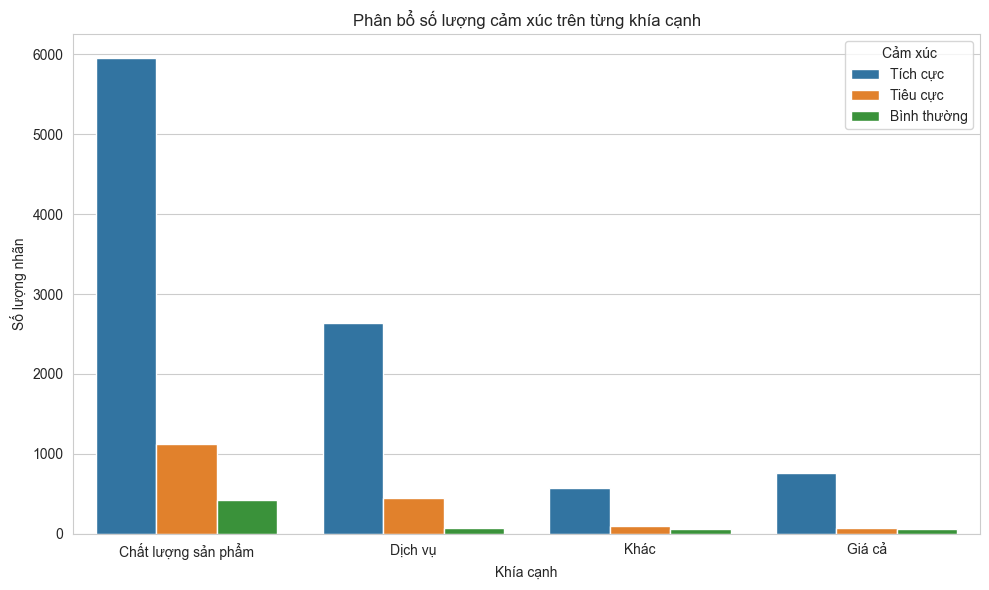

In [7]:
# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 6))
sns.barplot(data=as_df, x='Aspect', y='Count', hue='Sentiment')
plt.title('Ph√¢n b·ªï s·ªë l∆∞·ª£ng c·∫£m x√∫c tr√™n t·ª´ng kh√≠a c·∫°nh')
plt.xlabel('Kh√≠a c·∫°nh')
plt.ylabel('S·ªë l∆∞·ª£ng nh√£n')
plt.legend(title='C·∫£m x√∫c')
plt.tight_layout()
plt.show()


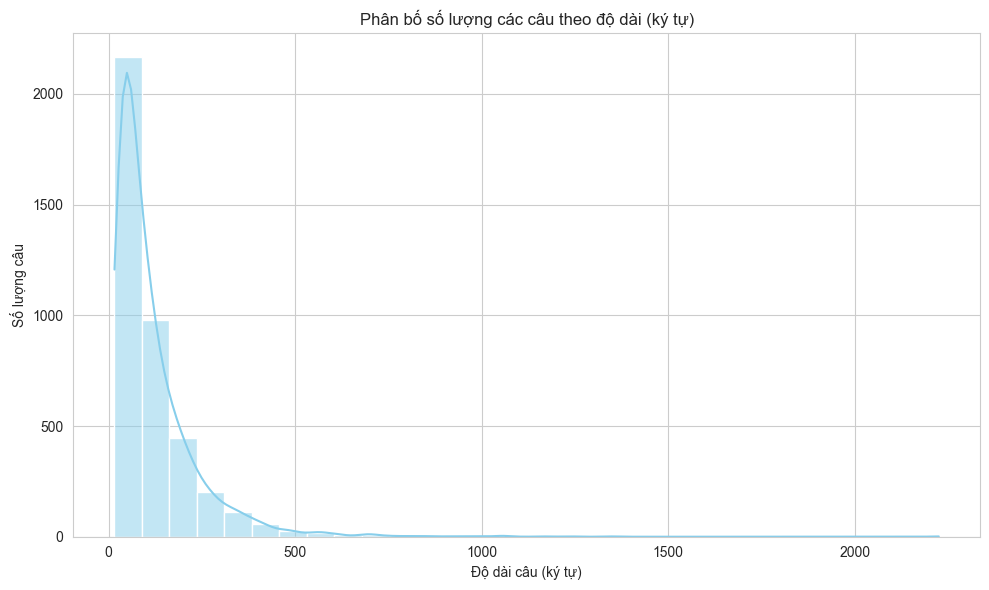

In [8]:
# Gi·∫£ s·ª≠ b·∫°n ƒë√£ c√≥ bi·∫øn text_lengths nh∆∞ sau:
# text_lengths = [len(text) for text in texts]

plt.figure(figsize=(10, 6))
sns.histplot(text_lengths, bins=30, kde=True, color='skyblue')
plt.title('Ph√¢n b·ªë s·ªë l∆∞·ª£ng c√°c c√¢u theo ƒë·ªô d√†i (k√Ω t·ª±)')
plt.xlabel('ƒê·ªô d√†i c√¢u (k√Ω t·ª±)')
plt.ylabel('S·ªë l∆∞·ª£ng c√¢u')
plt.tight_layout()
plt.show()


In [9]:
# Most common entities
print("Top 10 entities xu·∫•t hi·ªán nhi·ªÅu nh·∫•t:")
top_entities = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)[:10]
for entity, count in top_entities:
    print(f"  {entity}: {count}")

Top 10 entities xu·∫•t hi·ªán nhi·ªÅu nh·∫•t:
  giao h√†ng nhanh: 263
  Giao h√†ng nhanh: 179
  ƒë√≥ng g√≥i c·∫©n th·∫≠n: 117
  giao nhanh: 80
  Giao nhanh: 47
  gi√° r·∫ª: 39
  ch·∫•t l∆∞·ª£ng t·ªët: 37
  ƒê√≥ng g√≥i c·∫©n th·∫≠n: 36
  gi√° t·ªët: 35
  s·∫£n ph·∫©m t·ªët: 32


#### VISUALIZATION - PH√ÇN PH·ªêI NH√ÉN

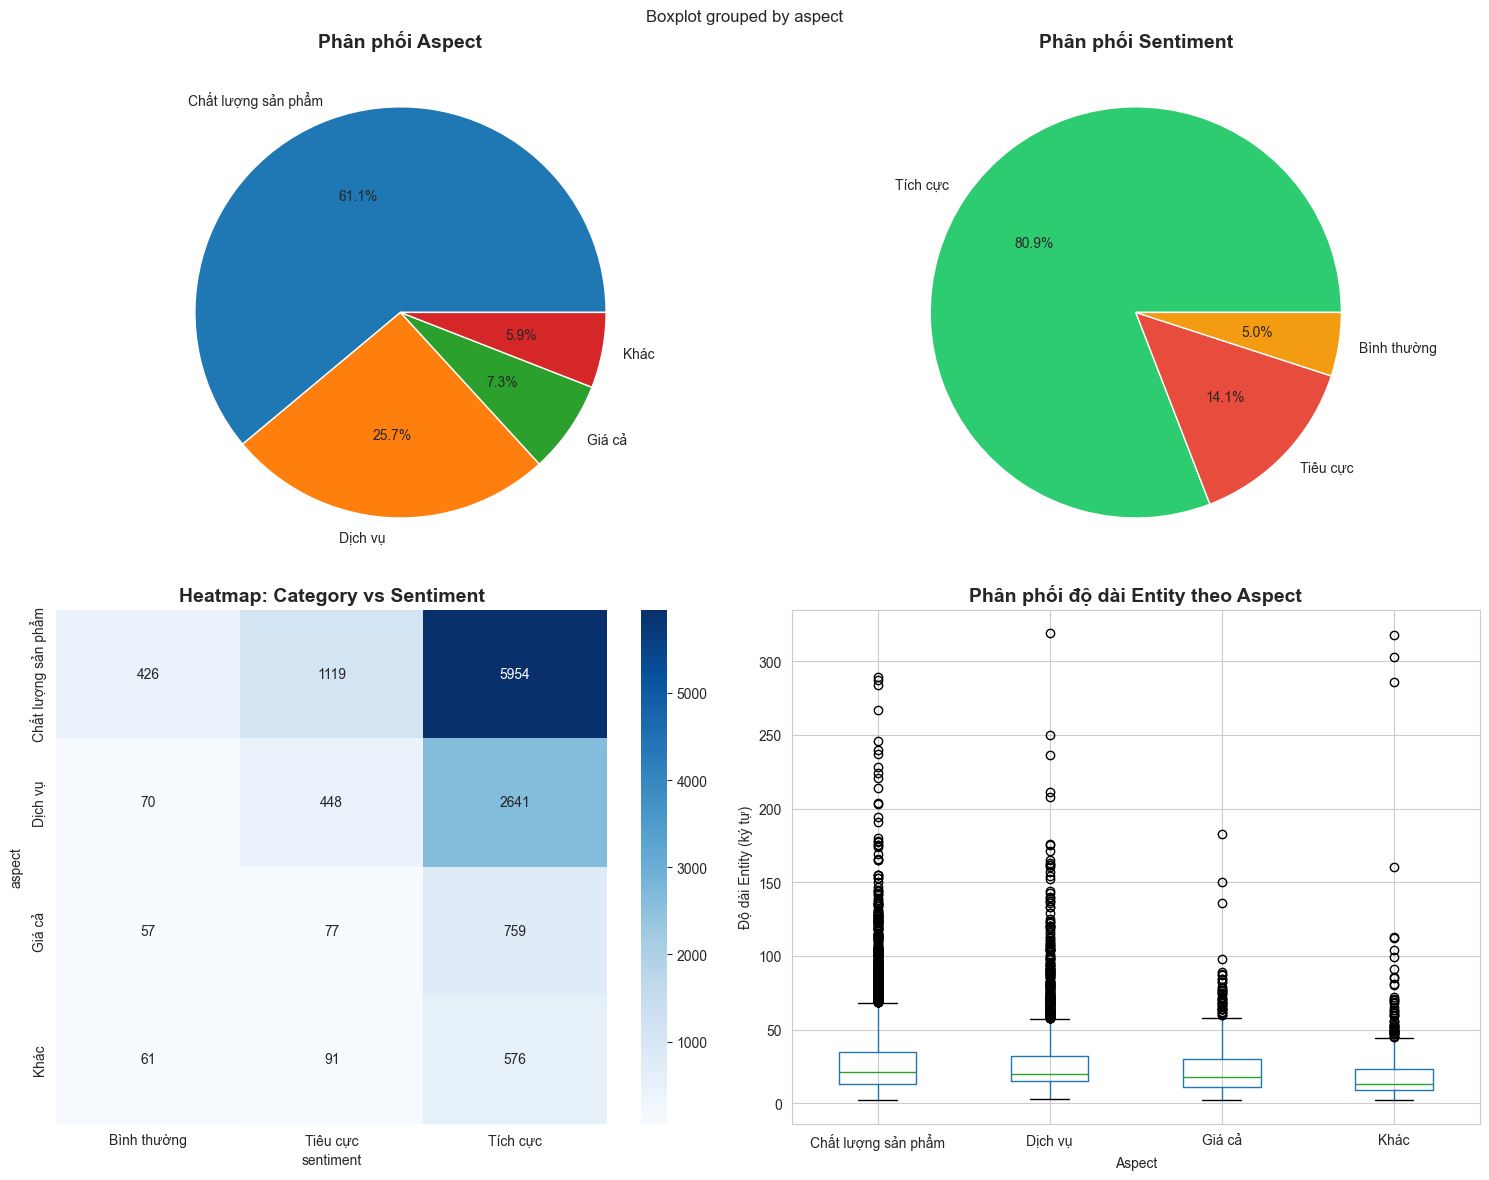

In [17]:
def plot_label_distribution(df):
    """V·∫Ω bi·ªÉu ƒë·ªì ph√¢n ph·ªëi nh√£n"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Ph√¢n ph·ªëi Aspect
    category_counts = df['aspect'].value_counts()
    axes[0,0].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
    axes[0,0].set_title('Ph√¢n ph·ªëi Aspect', fontsize=14, fontweight='bold')
    
    # 2. Ph√¢n ph·ªëi Sentiment
    sentiment_counts = df['sentiment'].value_counts()
    colors = ['#2ecc71', '#e74c3c', '#f39c12']  # Green, Red, Orange
    axes[0,1].pie(sentiment_counts.values, labels=sentiment_counts.index, 
                  autopct='%1.1f%%', colors=colors[:len(sentiment_counts)])
    axes[0,1].set_title('Ph√¢n ph·ªëi Sentiment', fontsize=14, fontweight='bold')
    
    # 3. Aspect vs Sentiment heatmap
    crosstab = pd.crosstab(df['aspect'], df['sentiment'])
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
    axes[1,0].set_title('Heatmap: Category vs Sentiment', fontsize=14, fontweight='bold')
    
    # 4. ƒê·ªô d√†i entity theo category
    df.boxplot(column='entity_length', by='aspect', ax=axes[1,1])
    axes[1,1].set_title('Ph√¢n ph·ªëi ƒë·ªô d√†i Entity theo Aspect', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Aspect')
    axes[1,1].set_ylabel('ƒê·ªô d√†i Entity (k√Ω t·ª±)')
    
    plt.tight_layout()
    plt.show()

plot_label_distribution(labels_df)


In [18]:
def plot_sentiment_distribution(sentiment_counts):
    """Plot sentiment distribution"""
    plt.figure(figsize=(10, 6))
    sentiments = list(sentiment_counts.keys())
    counts = list(sentiment_counts.values())
    
    colors = ['green', 'red', 'orange'][:len(sentiments)]
    plt.bar(sentiments, counts, color=colors, alpha=0.7)
    plt.title('Ph√¢n ph·ªëi Sentiment', fontsize=14, fontweight='bold')
    plt.xlabel('Sentiment')
    plt.ylabel('S·ªë l∆∞·ª£ng')
    
    # Add value labels on bars
    for i, v in enumerate(counts):
        plt.text(i, v + max(counts)*0.01, str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

def plot_aspect_distribution(aspect_counts):
    """Plot aspect distribution"""
    plt.figure(figsize=(12, 6))
    aspects = list(aspect_counts.keys())
    counts = list(aspect_counts.values())
    
    plt.bar(range(len(aspects)), counts, alpha=0.7)
    plt.title('Ph√¢n ph·ªëi Aspects', fontsize=14, fontweight='bold')
    plt.xlabel('Aspects')
    plt.ylabel('S·ªë l∆∞·ª£ng')
    plt.xticks(range(len(aspects)), aspects, rotation=45, ha='right')
    
    # Add value labels on bars
    for i, v in enumerate(counts):
        plt.text(i, v + max(counts)*0.01, str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

def plot_aspect_sentiment_heatmap(aspect_sentiment_counts):
    """Plot aspect-sentiment heatmap"""
    # Prepare data for heatmap
    aspects = list(aspect_sentiment_counts.keys())
    all_sentiments = set()
    for sentiments in aspect_sentiment_counts.values():
        all_sentiments.update(sentiments.keys())
    all_sentiments = sorted(list(all_sentiments))
    
    heatmap_data = []
    for aspect in aspects:
        row = []
        for sentiment in all_sentiments:
            count = aspect_sentiment_counts[aspect].get(sentiment, 0)
            row.append(count)
        heatmap_data.append(row)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, 
                xticklabels=all_sentiments,
                yticklabels=aspects,
                annot=True, 
                fmt='d',
                cmap='YlOrRd')
    plt.title('Aspect-Sentiment Distribution Heatmap', fontsize=14, fontweight='bold')
    plt.xlabel('Sentiment')
    plt.ylabel('Aspect')
    plt.tight_layout()
    plt.show()

def plot_text_length_distribution(text_lengths):
    """Plot text length distribution"""
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(text_lengths, bins=20, alpha=0.7, color='skyblue')
    plt.title('Ph√¢n ph·ªëi ƒë·ªô d√†i text (k√Ω t·ª±)')
    plt.xlabel('S·ªë k√Ω t·ª±')
    plt.ylabel('T·∫ßn su·∫•t')
    
    plt.subplot(1, 2, 2)
    plt.boxplot(text_lengths)
    plt.title('Box plot ƒë·ªô d√†i text')
    plt.ylabel('S·ªë k√Ω t·ª±')
    
    plt.tight_layout()
    plt.show()

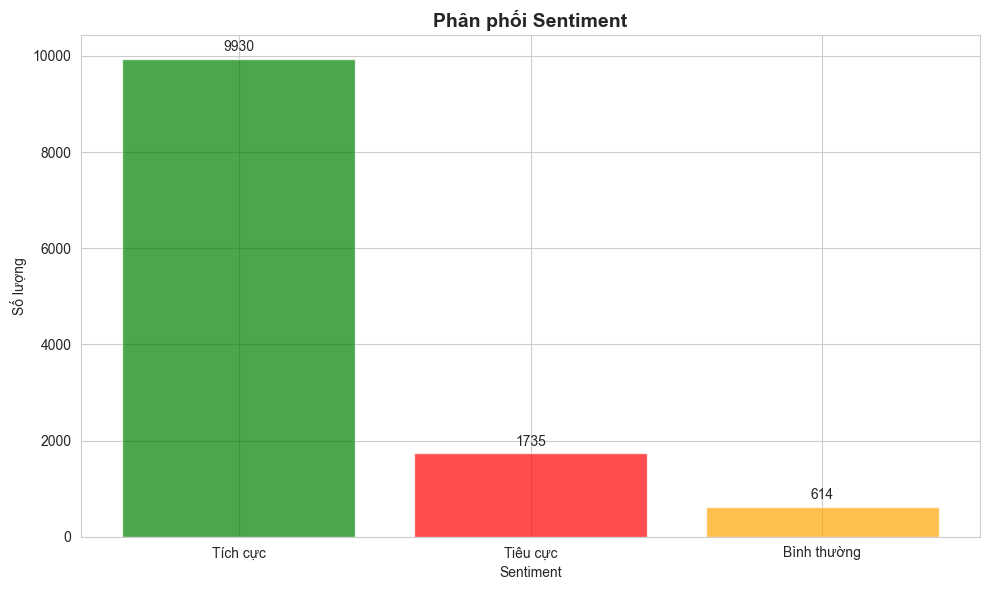

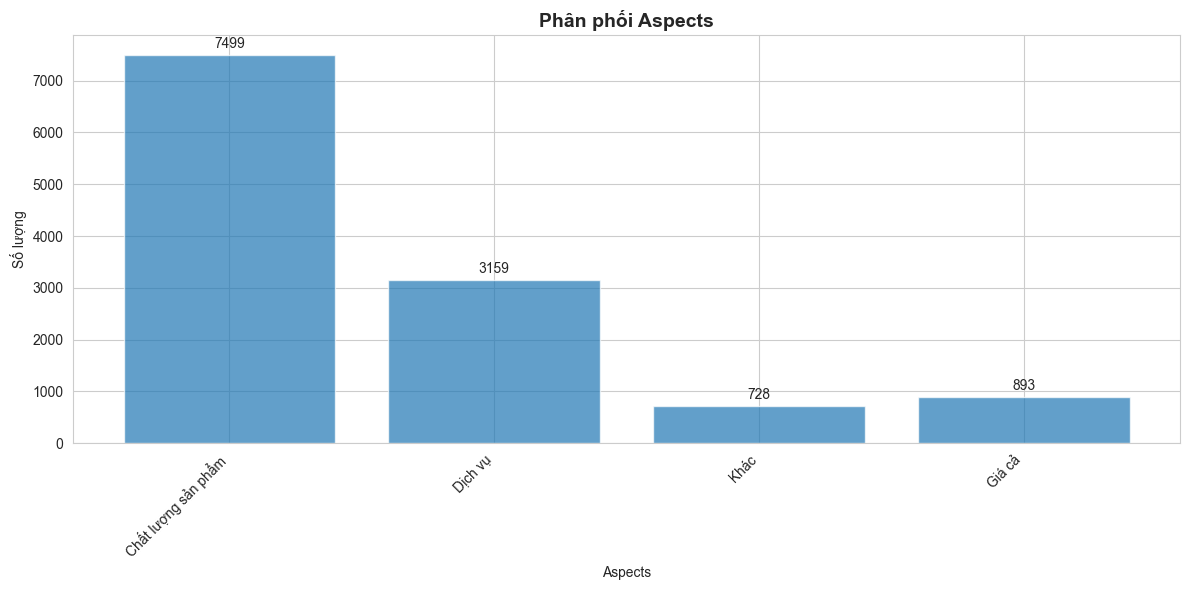

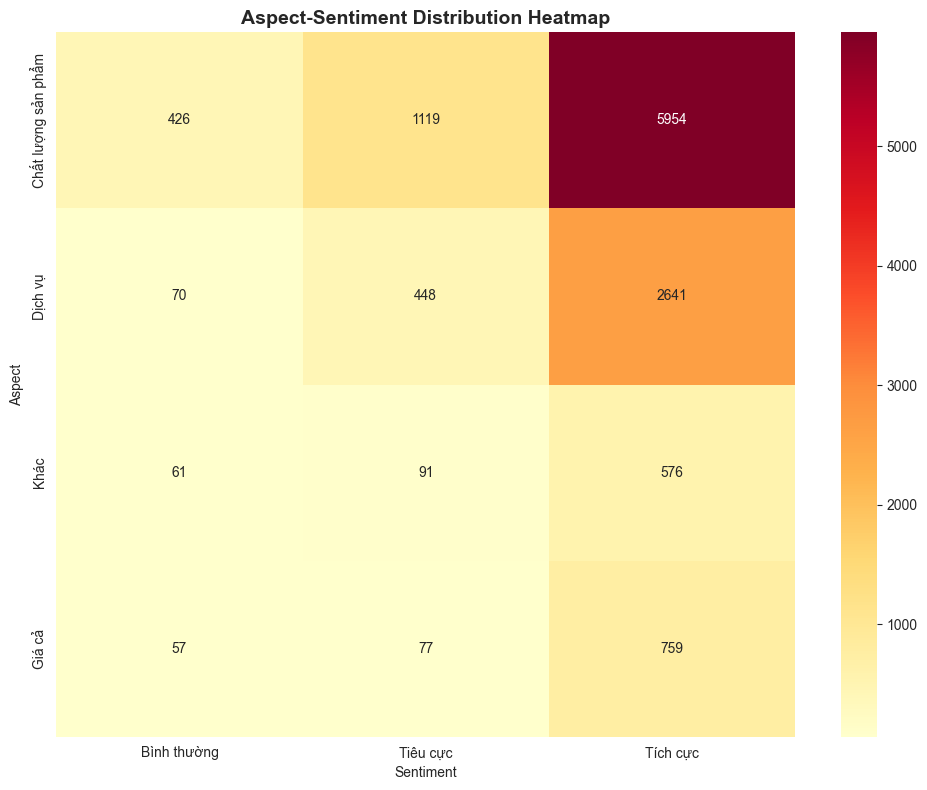

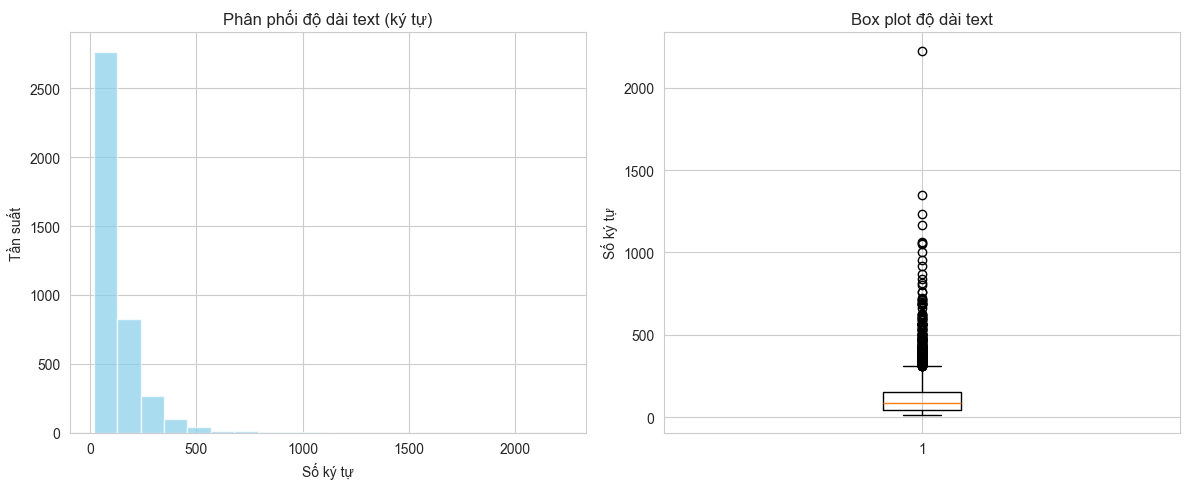

In [19]:
# Visualizations
plot_sentiment_distribution(sentiment_counts)
plot_aspect_distribution(aspect_counts)
plot_aspect_sentiment_heatmap(aspect_sentiment_counts)
plot_text_length_distribution(text_lengths)

#### PH√ÇN T√çCH THEO CATEGORY

In [22]:
def analyze_by_category(df):
    """Ph√¢n t√≠ch chi ti·∫øt theo t·ª´ng category"""
    print("=" * 50)
    print("üîç PH√ÇN T√çCH THEO CATEGORY")
    print("=" * 50)
    
    for category in df['aspect'].unique():
        cat_data = df[df['aspect'] == category]
        print(f"\nüìÇ {category.upper()}:")
        print(f"   ‚Ä¢ S·ªë l∆∞·ª£ng: {len(cat_data)} entities")
        print(f"   ‚Ä¢ Sentiment t√≠ch c·ª±c: {len(cat_data[cat_data['sentiment'] == 'T√≠ch c·ª±c'])}")
        print(f"   ‚Ä¢ Sentiment ti√™u c·ª±c: {len(cat_data[cat_data['sentiment'] == 'Ti√™u c·ª±c'])}")
        print(f"   ‚Ä¢ Sentiment b√¨nh th∆∞·ªùng: {len(cat_data[cat_data['sentiment'] == 'B√¨nh th∆∞·ªùng'])}")
        
        # Top entities cho category n√†y
        top_entities = cat_data['text_snippet'].value_counts().head(3)
        print("   ‚Ä¢ Top entities:", ", ".join(f'"{ent}"' for ent in top_entities.index))

analyze_by_category(labels_df)

üîç PH√ÇN T√çCH THEO CATEGORY

üìÇ CH·∫§T L∆Ø·ª¢NG S·∫¢N PH·∫®M:
   ‚Ä¢ S·ªë l∆∞·ª£ng: 7499 entities
   ‚Ä¢ Sentiment t√≠ch c·ª±c: 5954
   ‚Ä¢ Sentiment ti√™u c·ª±c: 1119
   ‚Ä¢ Sentiment b√¨nh th∆∞·ªùng: 426
   ‚Ä¢ Top entities: "ch·∫•t l∆∞·ª£ng t·ªët", "s·∫£n ph·∫©m t·ªët", "date xa"

üìÇ D·ªäCH V·ª§:
   ‚Ä¢ S·ªë l∆∞·ª£ng: 3159 entities
   ‚Ä¢ Sentiment t√≠ch c·ª±c: 2641
   ‚Ä¢ Sentiment ti√™u c·ª±c: 448
   ‚Ä¢ Sentiment b√¨nh th∆∞·ªùng: 70
   ‚Ä¢ Top entities: "giao h√†ng nhanh", "Giao h√†ng nhanh", "ƒë√≥ng g√≥i c·∫©n th·∫≠n"

üìÇ KH√ÅC:
   ‚Ä¢ S·ªë l∆∞·ª£ng: 728 entities
   ‚Ä¢ Sentiment t√≠ch c·ª±c: 576
   ‚Ä¢ Sentiment ti√™u c·ª±c: 91
   ‚Ä¢ Sentiment b√¨nh th∆∞·ªùng: 61
   ‚Ä¢ Top entities: "r·∫•t h√†i l√≤ng", "R·∫•t h√†i l√≤ng", "H√†i l√≤ng"

üìÇ GI√Å C·∫¢:
   ‚Ä¢ S·ªë l∆∞·ª£ng: 893 entities
   ‚Ä¢ Sentiment t√≠ch c·ª±c: 759
   ‚Ä¢ Sentiment ti√™u c·ª±c: 77
   ‚Ä¢ Sentiment b√¨nh th∆∞·ªùng: 57
   ‚Ä¢ Top entities: "gi√° r·∫ª", "gi√° t·ªët", "gi√° c·∫£ h·ª£p l√Ω"


#### TRAIN/VAL/TEST SPLIT SIMULATION 

In [27]:
def simulate_train_val_test_split(df, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    """M√¥ ph·ªèng ph√¢n chia d·ªØ li·ªáu th√†nh train/val/test"""
    print("=" * 50)
    print("üéØ M√î PH·ªéNG PH√ÇN CHIA D·ªÆ LI·ªÜU")
    print("=" * 50)
    
    assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-6, "T·ªïng t·ª∑ l·ªá ph·∫£i b·∫±ng 1"
    
    unique_texts = df['text_snippet'].unique()
    n_texts = len(unique_texts)
    
    n_train = int(n_texts * train_ratio)
    n_val = int(n_texts * val_ratio)
    n_test = n_texts - n_train - n_val
    
    print(f"üìä Ph√¢n chia d·ªØ li·ªáu:")
    print(f"   ‚Ä¢ Train: {n_train} reviews ({train_ratio*100:.1f}%)")
    print(f"   ‚Ä¢ Validation: {n_val} reviews ({val_ratio*100:.1f}%)")
    print(f"   ‚Ä¢ Test: {n_test} reviews ({test_ratio*100:.1f}%)")
    
    np.random.seed(42)
    shuffled_indices = np.random.permutation(n_texts)
    
    train_texts = unique_texts[shuffled_indices[:n_train]]
    val_texts = unique_texts[shuffled_indices[n_train:n_train+n_val]]
    test_texts = unique_texts[shuffled_indices[n_train+n_val:]]
    
    train_df = df[df['text_snippet'].isin(train_texts)]
    val_df = df[df['text_snippet'].isin(val_texts)]
    test_df = df[df['text_snippet'].isin(test_texts)]
    
    splits = {'Train': train_df, 'Validation': val_df, 'Test': test_df}

    print(f"\nüìà Ph√¢n ph·ªëi Sentiment trong c√°c split:")
    sentiment_dist = pd.DataFrame()
    for split_name, split_df in splits.items():
        if len(split_df) > 0:
            dist = split_df['sentiment'].value_counts(normalize=True) * 100
            sentiment_dist[split_name] = dist
    print(sentiment_dist.round(1))

    print(f"\nüìà Ph√¢n ph·ªëi Aspect trong c√°c split:")
    category_dist = pd.DataFrame()
    for split_name, split_df in splits.items():
        if len(split_df) > 0:
            dist = split_df['aspect'].value_counts(normalize=True) * 100
            category_dist[split_name] = dist
    print(category_dist.round(1))

    # üìö Th·ªëng k√™ vƒÉn b·∫£n
    print("\nüßÆ TH·ªêNG K√ä D·ªÆ LI·ªÜU:")
    def get_text_stats(df):
        num_samples = len(df)
        tokens = df['text_snippet'].apply(lambda x: str(x).split())
        all_words = [word for doc in tokens for word in doc]
        vocab = set(all_words)
        avg_len = tokens.apply(len).mean()
        median_len = tokens.apply(len).median()
        return {
            "S·ªë m·∫´u": num_samples,
            "T·ª´ v·ª±ng": len(vocab),
            "ƒê·ªô d√†i TB": round(avg_len, 2),
            "ƒê·ªô d√†i trung v·ªã": int(median_len)
        }

    all_df = pd.concat([train_df, val_df, test_df])
    stats = {
        'T·∫≠p d·ªØ li·ªáu': get_text_stats(all_df),
        'Train': get_text_stats(train_df),
        'Validation': get_text_stats(val_df),
        'Test': get_text_stats(test_df)
    }

    stat_df = pd.DataFrame(stats)
    print(stat_df)

    return train_df, val_df, test_df


# Th·ª±c hi·ªán ph√¢n chia
train_df, val_df, test_df = simulate_train_val_test_split(labels_df)


üéØ M√î PH·ªéNG PH√ÇN CHIA D·ªÆ LI·ªÜU
üìä Ph√¢n chia d·ªØ li·ªáu:
   ‚Ä¢ Train: 7648 reviews (80.0%)
   ‚Ä¢ Validation: 956 reviews (10.0%)
   ‚Ä¢ Test: 957 reviews (10.0%)

üìà Ph√¢n ph·ªëi Sentiment trong c√°c split:
             Train  Validation  Test
T√≠ch c·ª±c      80.6        83.4  79.9
Ti√™u c·ª±c      14.2        12.2  15.9
B√¨nh th∆∞·ªùng    5.2         4.4   4.2

üìà Ph√¢n ph·ªëi Aspect trong c√°c split:
                     Train  Validation  Test
Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m   62.1        55.6  59.6
D·ªãch v·ª•               24.6        33.9  25.3
Gi√° c·∫£                 7.2         7.0   8.5
Kh√°c                   6.2         3.5   6.6

üßÆ TH·ªêNG K√ä D·ªÆ LI·ªÜU:
                 T·∫≠p d·ªØ li·ªáu    Train  Validation     Test
S·ªë m·∫´u              12279.00  9618.00     1431.00  1230.00
T·ª´ v·ª±ng              5401.00  4810.00     1709.00  1577.00
ƒê·ªô d√†i TB               6.35     6.42        5.92     6.27
ƒê·ªô d√†i trung v·ªã         5.00     5.00     

### Text Mining Analysis

In [38]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import re

# Ti·ªÅn x·ª≠ l√Ω text
def preprocess_text(text):
    # Lo·∫°i b·ªè s·ªë, k√Ω t·ª± ƒë·∫∑c bi·ªát, ch·ªâ gi·ªØ ch·ªØ c√°i ti·∫øng Vi·ªát
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.lower().strip()

# T·∫°o corpus cho m·ªói sentiment
positive_texts = labels_df[labels_df['sentiment'] == 'T√≠ch c·ª±c']['text_snippet'].apply(preprocess_text)
negative_texts = labels_df[labels_df['sentiment'] == 'Ti√™u c·ª±c']['text_snippet'].apply(preprocess_text)
neutral_texts = labels_df[labels_df['sentiment'] == 'B√¨nh th∆∞·ªùng']['text_snippet'].apply(preprocess_text)

# Word frequency analysis
def get_top_words(texts, n=20):
    vectorizer = CountVectorizer(max_features=1000, ngram_range=(1, 2))
    word_freq = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    frequencies = word_freq.sum(axis=0).A1
    word_freq_dict = dict(zip(feature_names, frequencies))
    return sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:n]

In [39]:
print("=== TOP WORDS - T√çCH C·ª∞C ===")
positive_words = get_top_words(positive_texts)
for word, freq in positive_words:
    print(f"{word}: {freq}")


=== TOP WORDS - T√çCH C·ª∞C ===
h√†ng: 1876
giao: 1477
nhanh: 1439
r·∫•t: 1192
t·ªët: 1084
giao h√†ng: 1051
s·∫£n: 754
ph·∫©m: 744
s·∫£n ph·∫©m: 730
h√†ng nhanh: 696
g√≥i: 660
kh√¥ng: 645
gi√°: 629
ƒë√≥ng: 615
ƒë√≥ng g√≥i: 592
ch·∫•t: 569
tiki: 542
l∆∞·ª£ng: 527
ƒë·∫πp: 515
ch·∫•t l∆∞·ª£ng: 507


(-0.5, 799.5, 399.5, -0.5)

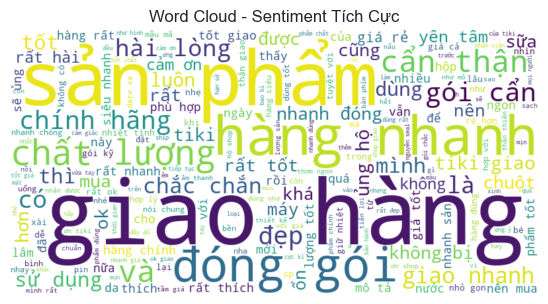

In [42]:
# Word cloud cho sentiment t√≠ch c·ª±c
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
positive_text = ' '.join(positive_texts)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud - Sentiment T√≠ch C·ª±c')
plt.axis('off')

In [40]:
print("\n=== TOP WORDS - TI√äU C·ª∞C ===")
negative_words = get_top_words(negative_texts)
for word, freq in negative_words:
    print(f"{word}: {freq}")


=== TOP WORDS - TI√äU C·ª∞C ===
kh√¥ng: 614
h√†ng: 314
c√≥: 279
h∆°i: 273
b·ªã: 229
ƒë∆∞·ª£c: 191
giao: 188
l√†: 158
th√¨: 141
m√¨nh: 136
khi: 120
n√™n: 116
qu√°: 110
mua: 108
tiki: 101
s·∫£n: 100
h·ªôp: 99
m√†: 97
ph·∫©m: 97
v√†: 96


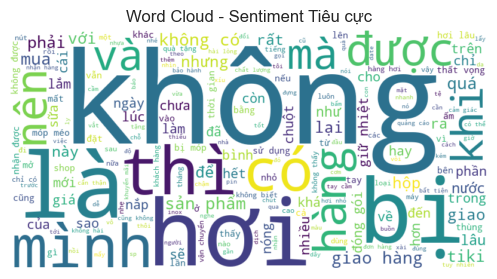

In [43]:
# Word cloud cho sentiment ti√™u c·ª±c
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
negative_text = ' '.join(negative_texts)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud - Sentiment Ti√™u c·ª±c')
plt.axis('off')
plt.tight_layout()
plt.show()

In [41]:
print("\n=== TOP WORDS - B√åNH TH∆Ø·ªúNG ===")
neutral_words = get_top_words(neutral_texts)
for word, freq in neutral_words:
    print(f"{word}: {freq}")


=== TOP WORDS - B√åNH TH∆Ø·ªúNG ===
kh√¥ng: 179
c√≥: 119
ch∆∞a: 105
bi·∫øt: 90
ƒë∆∞·ª£c: 89
th√¨: 81
gi√°: 69
ch·∫•t: 65
l∆∞·ª£ng: 61
n√™n: 59
d√πng: 58
ch·∫•t l∆∞·ª£ng: 57
m√¨nh: 55
b·ªÅn: 49
m·ªõi: 49
l√†: 47
ƒë·ªô: 45
nh∆∞ng: 43
ph·∫£i: 43
b√¨nh: 42


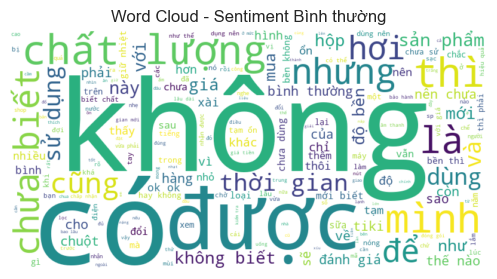

In [44]:
# Word cloud cho sentiment b√¨nh th∆∞·ªùng
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
neutral_text = ' '.join(neutral_texts)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud - Sentiment B√¨nh th∆∞·ªùng')
plt.axis('off')
plt.tight_layout()
plt.show()

### Correlation and Pattern Analysis

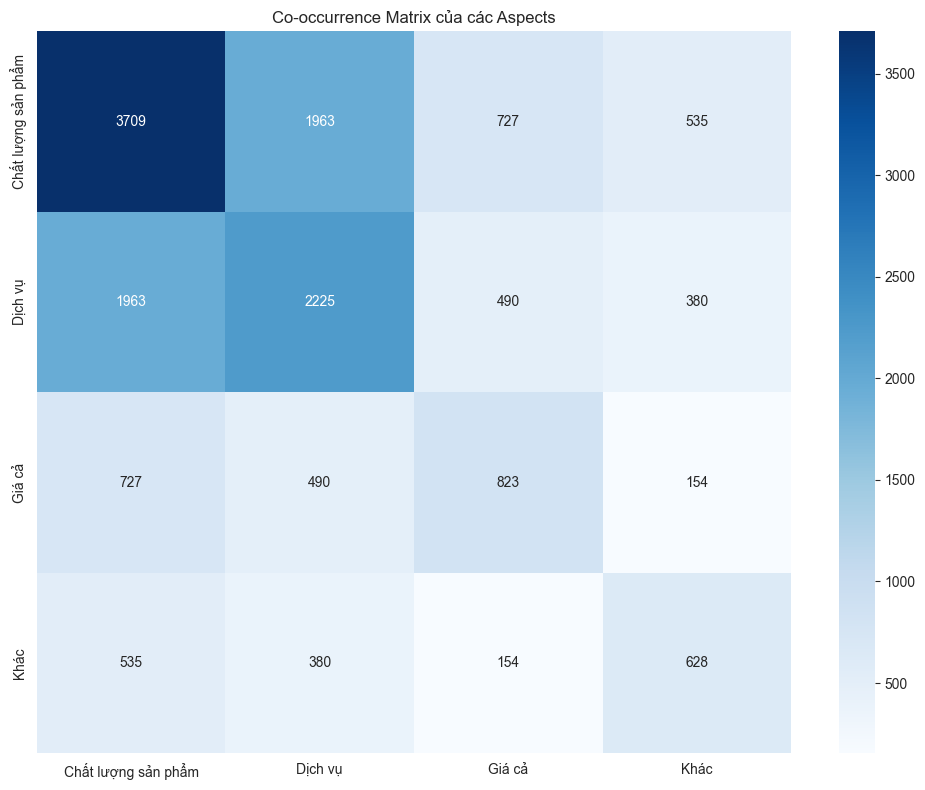

In [61]:
# T·∫°o matrix aspect co-occurrence
asp_counts = labels_df['aspect'].value_counts()
aspect_cooccurrence = pd.DataFrame(0, index=asp_counts.index, columns=asp_counts.index)

for review_id in labels_df['review_id'].unique():
    review_aspects = labels_df[labels_df['review_id'] == review_id]['aspect'].unique()
    for i, aspect1 in enumerate(review_aspects):
        for aspect2 in review_aspects[i:]:
            aspect_cooccurrence.loc[aspect1, aspect2] += 1
            if aspect1 != aspect2:
                aspect_cooccurrence.loc[aspect2, aspect1] += 1

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(aspect_cooccurrence, annot=True, cmap='Blues', fmt='d')
plt.title('Co-occurrence Matrix c·ªßa c√°c Aspects')
plt.tight_layout()
plt.show()

In [46]:
# T·∫°o DataFrame cho reviews
reviews_df = pd.DataFrame([{
    'review_id': i,
    'text': item['text'],
    'text_length': len(item['text']),
    'num_labels': len(item['labels'])
} for i, item in enumerate(data)])

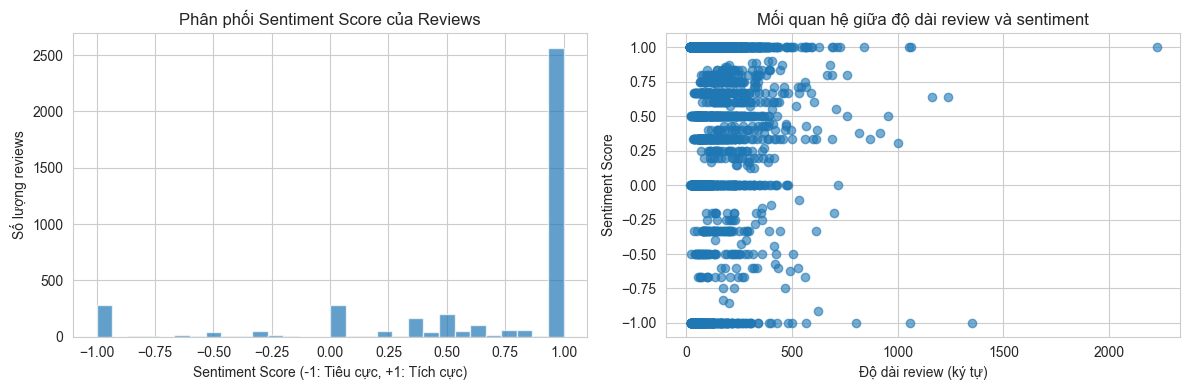

In [47]:
# T√≠nh sentiment score cho m·ªói review
review_sentiment_scores = []
for review_id in reviews_df['review_id']:
    review_labels = labels_df[labels_df['review_id'] == review_id]
    if len(review_labels) > 0:
        positive_count = (review_labels['sentiment'] == 'T√≠ch c·ª±c').sum()
        negative_count = (review_labels['sentiment'] == 'Ti√™u c·ª±c').sum()
        total_count = len(review_labels)
        sentiment_score = (positive_count - negative_count) / total_count
    else:
        sentiment_score = 0
    
    review_sentiment_scores.append({
        'review_id': review_id,
        'sentiment_score': sentiment_score,
        'positive_count': positive_count,
        'negative_count': negative_count,
        'total_aspects': total_count
    })

sentiment_df = pd.DataFrame(review_sentiment_scores)
reviews_df = reviews_df.merge(sentiment_df, on='review_id')

# Visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(reviews_df['sentiment_score'], bins=30, alpha=0.7)
plt.title('Ph√¢n ph·ªëi Sentiment Score c·ªßa Reviews')
plt.xlabel('Sentiment Score (-1: Ti√™u c·ª±c, +1: T√≠ch c·ª±c)')
plt.ylabel('S·ªë l∆∞·ª£ng reviews')

plt.subplot(1, 2, 2)
plt.scatter(reviews_df['text_length'], reviews_df['sentiment_score'], alpha=0.6)
plt.title('M·ªëi quan h·ªá gi·ªØa ƒë·ªô d√†i review v√† sentiment')
plt.xlabel('ƒê·ªô d√†i review (k√Ω t·ª±)')
plt.ylabel('Sentiment Score')
plt.tight_layout()
plt.show()

#### RECOMMENDATIONS

In [29]:
def provide_recommendations(df):
    """ƒê∆∞a ra khuy·∫øn ngh·ªã cho vi·ªác x·ª≠ l√Ω d·ªØ li·ªáu"""
    print("=" * 50)
    print("üí° KHUY·∫æN NGH·ªä V√Ä G·ª¢I √ù")
    print("=" * 50)
    
    # Ki·ªÉm tra class imbalance
    sentiment_counts = df['sentiment'].value_counts()
    max_count = sentiment_counts.max()
    min_count = sentiment_counts.min()
    imbalance_ratio = max_count / min_count
    
    print(f"‚öñÔ∏è Ph√¢n t√≠ch Class Imbalance:")
    print(f"   ‚Ä¢ T·ª∑ l·ªá imbalance: {imbalance_ratio:.2f}")
    
    if imbalance_ratio > 3:
        print("   ‚ö†Ô∏è Dataset c√≥ v·∫•n ƒë·ªÅ imbalance nghi√™m tr·ªçng!")
        print("   üí° Khuy·∫øn ngh·ªã: S·ª≠ d·ª•ng SMOTE, class weighting, ho·∫∑c stratified sampling")
    elif imbalance_ratio > 2:
        print("   ‚ö†Ô∏è Dataset c√≥ imbalance v·ª´a ph·∫£i")
        print("   üí° Khuy·∫øn ngh·ªã: S·ª≠ d·ª•ng stratified split v√† class weighting")
    else:
        print("   ‚úÖ Dataset t∆∞∆°ng ƒë·ªëi c√¢n b·∫±ng")
    
    # Ph√¢n t√≠ch ƒë·ªô d√†i text
    avg_length = df['entity_length'].mean()
    max_length = df['entity_length'].max()

    

provide_recommendations(labels_df)

üí° KHUY·∫æN NGH·ªä V√Ä G·ª¢I √ù
‚öñÔ∏è Ph√¢n t√≠ch Class Imbalance:
   ‚Ä¢ T·ª∑ l·ªá imbalance: 16.17
   ‚ö†Ô∏è Dataset c√≥ v·∫•n ƒë·ªÅ imbalance nghi√™m tr·ªçng!
   üí° Khuy·∫øn ngh·ªã: S·ª≠ d·ª•ng SMOTE, class weighting, ho·∫∑c stratified sampling


In [30]:
# Ph√¢n t√≠ch nh√£n entity
def extract_entity_info(labels_list):
    """Tr√≠ch xu·∫•t th√¥ng tin v·ªÅ c√°c entity"""
    entities = []
    entity_types = []
    sentiments = []
    
    for labels in labels_list:
        for label in labels:
            start, end, entity_text, category = label
            category_parts = category.split('#')
            entity_type = category_parts[0]
            sentiment = category_parts[1] if len(category_parts) > 1 else 'Unknown'
            
            entities.append(entity_text)
            entity_types.append(entity_type)
            sentiments.append(sentiment)
    
    return entities, entity_types, sentiments

entities, entity_types, sentiments = extract_entity_info(all_labels)

print("=== TH·ªêNG K√ä ENTITY ===")
print(f"T·ªïng s·ªë entity: {len(entities)}")
print(f"S·ªë lo·∫°i entity type: {len(set(entity_types))}")
print(f"S·ªë lo·∫°i sentiment: {len(set(sentiments))}")

# %%
# Ph√¢n ph·ªëi Entity Types
entity_type_counts = Counter(entity_types)
print("\n=== PH√ÇN PH·ªêI ENTITY TYPES ===")
for entity_type, count in entity_type_counts.most_common():
    print(f"{entity_type}: {count} ({count/len(entity_types)*100:.1f}%)")

# %%
# Ph√¢n ph·ªëi Sentiments
sentiment_counts = Counter(sentiments)
print("\n=== PH√ÇN PH·ªêI SENTIMENTS ===")
for sentiment, count in sentiment_counts.most_common():
    print(f"{sentiment}: {count} ({count/len(sentiments)*100:.1f}%)")

# %%
# Ph√¢n ph·ªëi k·∫øt h·ª£p Entity Type + Sentiment
combined_labels = [f"{et}#{s}" for et, s in zip(entity_types, sentiments)]
combined_counts = Counter(combined_labels)

print("\n=== PH√ÇN PH·ªêI K·∫æT H·ª¢P (Entity Type + Sentiment) ===")
for label, count in combined_counts.most_common():
    print(f"{label}: {count} ({count/len(combined_labels)*100:.1f}%)")

=== TH·ªêNG K√ä ENTITY ===
T·ªïng s·ªë entity: 12279
S·ªë lo·∫°i entity type: 4
S·ªë lo·∫°i sentiment: 3

=== PH√ÇN PH·ªêI ENTITY TYPES ===
Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m: 7499 (61.1%)
D·ªãch v·ª•: 3159 (25.7%)
Gi√° c·∫£: 893 (7.3%)
Kh√°c: 728 (5.9%)

=== PH√ÇN PH·ªêI SENTIMENTS ===
T√≠ch c·ª±c: 9930 (80.9%)
Ti√™u c·ª±c: 1735 (14.1%)
B√¨nh th∆∞·ªùng: 614 (5.0%)

=== PH√ÇN PH·ªêI K·∫æT H·ª¢P (Entity Type + Sentiment) ===
Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m#T√≠ch c·ª±c: 5954 (48.5%)
D·ªãch v·ª•#T√≠ch c·ª±c: 2641 (21.5%)
Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m#Ti√™u c·ª±c: 1119 (9.1%)
Gi√° c·∫£#T√≠ch c·ª±c: 759 (6.2%)
Kh√°c#T√≠ch c·ª±c: 576 (4.7%)
D·ªãch v·ª•#Ti√™u c·ª±c: 448 (3.6%)
Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m#B√¨nh th∆∞·ªùng: 426 (3.5%)
Kh√°c#Ti√™u c·ª±c: 91 (0.7%)
Gi√° c·∫£#Ti√™u c·ª±c: 77 (0.6%)
D·ªãch v·ª•#B√¨nh th∆∞·ªùng: 70 (0.6%)
Kh√°c#B√¨nh th∆∞·ªùng: 61 (0.5%)
Gi√° c·∫£#B√¨nh th∆∞·ªùng: 57 (0.5%)


In [31]:
def get_document_main_label(labels):
    """L·∫•y nh√£n ch√≠nh c·ªßa document ƒë·ªÉ stratify"""
    if not labels:
        return "Kh√°c#B√¨nh th∆∞·ªùng"  # default label
    
    # ƒê·∫øm frequency c·ªßa t·ª´ng combined label trong document
    doc_labels = []
    for label in labels:
        category = label[3]  # category field
        doc_labels.append(category)
    
    # Tr·∫£ v·ªÅ nh√£n ph·ªï bi·∫øn nh·∫•t trong document
    return Counter(doc_labels).most_common(1)[0][0]

# T·∫°o stratification labels
stratify_labels = [get_document_main_label(labels) for labels in all_labels]
stratify_counter = Counter(stratify_labels)

In [32]:
# Ph√¢n t√≠ch ƒë·ªô imbalanced
def calculate_imbalance_ratio(counts):
    """T√≠nh to√°n t·ª∑ l·ªá imbalanced"""
    max_count = max(counts.values())
    min_count = min(counts.values())
    return max_count / min_count

entity_imbalance = calculate_imbalance_ratio(entity_type_counts)
sentiment_imbalance = calculate_imbalance_ratio(sentiment_counts)
combined_imbalance = calculate_imbalance_ratio(combined_counts)

print("=== PH√ÇN T√çCH ƒê·ªò IMBALANCED ===")
print(f"T·ª∑ l·ªá imbalanced Entity Types: {entity_imbalance:.2f}")
print(f"T·ª∑ l·ªá imbalanced Sentiments: {sentiment_imbalance:.2f}")
print(f"T·ª∑ l·ªá imbalanced Combined Labels: {combined_imbalance:.2f}")

=== PH√ÇN T√çCH ƒê·ªò IMBALANCED ===
T·ª∑ l·ªá imbalanced Entity Types: 10.30
T·ª∑ l·ªá imbalanced Sentiments: 16.17
T·ª∑ l·ªá imbalanced Combined Labels: 104.46


#### FEATURE ENGINEERING

##### Text-based Features

In [48]:
# C√†i ƒë·∫∑t: pip install underthesea
from underthesea import text_normalize
import requests

def get_vietnamese_stopwords():
    """Danh s√°ch Vietnamese stopwords ƒë∆∞·ª£c t·∫°o th·ªß c√¥ng - ƒë·∫ßy ƒë·ªß nh·∫•t"""
    
    vietnamese_stopwords = [
        # ƒê·∫°i t·ª´ nh√¢n x∆∞ng
        't√¥i', 'b·∫°n', 'anh', 'ch·ªã', 'em', '√¥ng', 'b√†', 'c√¥', 'ch√∫', 'c·∫≠u', 'm√†y', 'tao',
        'n√≥', 'h·ªç', 'ch√∫ng', 'm√¨nh', 'ta', 'ch√∫ng ta', 'ch√∫ng t√¥i', 'c√°c b·∫°n',
        
        # ƒê·∫°i t·ª´ ch·ªâ ƒë·ªãnh
        'n√†y', 'kia', 'ƒë√≥', 'ƒë√¢y', '·∫•y', 'n·ªç', 'k√¨a',
        
        # ƒê·ªông t·ª´ tobe v√† tr·ª£ ƒë·ªông t·ª´
        'l√†', 'th√¨', 'm√†', 'ƒë∆∞·ª£c', 'c√≥', 'kh√¥ng', 'ch∆∞a', 'ƒë√£', 's·∫Ω', 'ƒëang', 'v·ª´a',
        'b·ªã', 'cho', 'c·ªßa', 'do', 'ƒë·ªÉ', 'trong', 'ngo√†i', 'tr√™n', 'd∆∞·ªõi', 'gi·ªØa',
        
        # Li√™n t·ª´
        'v√†', 'v·ªõi', 'c√πng', 'ho·∫∑c', 'hay', 'nh∆∞ng', 'm√†', 'song', 'tuy', 'd√π', 'd·∫´u',
        'n·∫øu', 'gi·∫£ s·ª≠', 'v√¨', 'b·ªüi v√¨', 'do ƒë√≥', 'n√™n', 'cho n√™n', 'v·∫≠y', 'th·∫ø',
        
        # Gi·ªõi t·ª´
        'v·ªÅ', 't·ª´', 'ƒë·∫øn', 't·∫°i', '·ªü', 'b·∫±ng', 'theo', 'd·ªçc', 'qua', 'ra', 'v√†o',
        'l√™n', 'xu·ªëng', 'sang', 't·ªõi', 'ƒëi', 'l·∫°i', 'v·ªÅ ph√≠a', 'h∆∞·ªõng v·ªÅ',
        
        # Tr·∫°ng t·ª´
        'r·∫•t', 'l·∫Øm', 'nhi·ªÅu', '√≠t', 'h∆°n', 'n·ªØa', 'th√™m', 'b·ªõt', 'c≈©ng', 'lu√¥n',
        'ch·ªâ', 'ch·ªâ c√≥', 'ch·ªâ l√†', 'duy nh·∫•t', 'ƒë∆°n thu·∫ßn', 'thu·∫ßn t√∫y', 'ho√†n to√†n',
        'tuy·ªát ƒë·ªëi', 'kh√°', 'kh√° l√†', 't∆∞∆°ng ƒë·ªëi', 'h∆°i', 'h∆°i h∆°i', 'th·∫≠t',
        
        # T·ª´ h·ªèi
        'g√¨', 'ai', 'ƒë√¢u', 'n√†o', 'sao', 'th·∫ø n√†o', 'ra sao', 'bao gi·ªù', 'khi n√†o',
        't·∫°i sao', 'v√¨ sao', 't·∫°i l√†m sao', 'l√†m g√¨', 'bao nhi√™u', 'm·∫•y',
        
        # T·ª´ ph·ªß ƒë·ªãnh
        'kh√¥ng', 'ch∆∞a', 'ch·∫≥ng', 'ƒë√¢u c√≥', 'ƒë√¢u ph·∫£i', 'ch·∫£', 'kh·ªèi', 'th√¥i',
        
        # T·ª´ th·ªùi gian
        'h√¥m nay', 'ng√†y mai', 'h√¥m qua', 'tu·∫ßn n√†y', 'tu·∫ßn tr∆∞·ªõc', 'tu·∫ßn sau',
        'th√°ng n√†y', 'th√°ng tr∆∞·ªõc', 'th√°ng sau', 'nƒÉm n√†y', 'nƒÉm ngo√°i', 'nƒÉm sau',
        's√°ng', 'tr∆∞a', 'chi·ªÅu', 't·ªëi', 'khuya', 'ƒë√™m', 's·ªõm', 'mu·ªôn',
        'b√¢y gi·ªù', 'l√∫c n√†y', 'hi·ªán t·∫°i', 'tr∆∞·ªõc ƒë√¢y', 'sau n√†y', 't∆∞∆°ng lai',
        
        # T·ª´ s·ªë l∆∞·ª£ng
        'm·ªôt', 'hai', 'ba', 'b·ªën', 'nƒÉm', 's√°u', 'b·∫£y', 't√°m', 'ch√≠n', 'm∆∞·ªùi',
        'm∆∞·ªùi m·ªôt', 'm∆∞·ªùi hai', 'hai m∆∞·ªùi', 'ba m∆∞·ªùi', 'trƒÉm', 'ngh√¨n', 'tri·ªáu', 't·ª∑',
        'ƒë√¥i', 'c·∫∑p', 's·ªë', 'v√†i', 'm·ªôt s·ªë', 'm·ªôt v√†i', 'nhi·ªÅu', '√≠t', 't·∫•t c·∫£', 'm·ªçi',
        
        # Th√°n t·ª´ v√† t·ª´ nh·∫•n m·∫°nh
        '·ªì', '√¥', '∆°', '·ªë', '·ªô', '·ªù', '√†', '·∫°', '·∫°', '·ª´', '·ª≠', '·ªß', 'h·∫£', 'h·ª≠', 'g√¨',
        'th·∫ø', '·∫•y', 'v·∫≠y', 'nh∆∞ v·∫≠y', 'nh∆∞ th·∫ø', 'th·∫ø n√†y', 'v·∫≠y n√†y',
        
        # T·ª´ logic v√† k·∫øt n·ªëi
        'n·∫øu', 'th√¨', 'th·∫ø th√¨', 'v·∫≠y th√¨', 'nh∆∞ v·∫≠y th√¨', 'do ƒë√≥', 'cho n√™n', 'v√¨ th·∫ø',
        'b·ªüi v·∫≠y', 'n√™n', 'm√†', 'nh∆∞ng m√†', 'song', 'tuy nhi√™n', 'tuy v·∫≠y', 'd√π v·∫≠y',
        
        # T·ª´ b·ªï nghƒ©a
        'kh√°', 'r·∫•t', 'l·∫Øm', 'h·∫øt s·ª©c', 'v√¥ c√πng', 'c·ª±c k·ª≥', 'v√¥ c√πng t·∫≠n', 'h∆°i',
        't∆∞∆°ng ƒë·ªëi', 'b√¨nh th∆∞·ªùng', 'th√¥ng th∆∞·ªùng', 'th∆∞·ªùng', 'th·ªânh tho·∫£ng', 'ƒë√¥i khi',
        
        # C√°c t·ª´ kh√°c th∆∞·ªùng g·∫∑p
        'c√°i', 'con', 'chi·∫øc', 'qu·∫£', 'tr√°i', 'h√≤n', 'vi√™n', 't·ªù', 'cu·ªën', 'quy·ªÉn',
        'c√¢y', 'c√†nh', 'l√°', 'b√¥ng', 'hoa', 'tr√°i', 'qu·∫£',
        '√¥ng', 'b√†', 'anh', 'ch·ªã', 'em', 'c√¥', 'd√¨', 'ch√∫', 'b√°c', 'th√≠m',
        
        # T·ª´ ch·ªâ v·ªã tr√≠, h∆∞·ªõng
        'ƒë√¢y', 'ƒë√≥', 'kia', 'n√†y', 'n·ªç', 'b√™n', 'c·∫°nh', 'g·∫ßn', 'xa', 'trong', 'ngo√†i',
        'tr√™n', 'd∆∞·ªõi', 'tr∆∞·ªõc', 'sau', 'gi·ªØa', 'kh·∫Øp', 'su·ªët', 'd·ªçc', 'ngang',
        
        # T·ª´ ch·ªâ tr·∫°ng th√°i
        'ƒëang', 'ƒë√£', 's·∫Ω', 'v·ª´a', 'm·ªõi', 'c≈©', 'c≈© r·ªìi', 'r·ªìi', 'xong', 'xong r·ªìi',
        
        # T·ª´ ch·ªâ m·ª©c ƒë·ªô so s√°nh
        'h∆°n', 'k√©m', 'b·∫±ng', 'nh∆∞', 'gi·ªëng', 'gi·ªëng nh∆∞', 'kh√¥ng b·∫±ng', 'kh√¥ng nh∆∞',
        't·ªët h∆°n', 'k√©m h∆°n', 'b·∫±ng nhau', 'ngang nhau',
        
        # T·ª´ chuy√™n d·ª•ng trong review
        's·∫£n ph·∫©m', 'h√†ng', 'ƒë·ªì', 'th·ª©', 'lo·∫°i', 'ki·ªÉu', 'd·∫°ng', 'm√≥n', 'c√°i',
        'shop', 'c·ª≠a h√†ng', 'nh√†', 'c√¥ng ty', 'th∆∞∆°ng hi·ªáu', 'brand', 'm√¨nh',
        'giao h√†ng', 'ship', 'shipping', 'ƒë√≥ng g√≥i', 'bao b√¨', 'h·ªôp'
    ]
    
    return vietnamese_stopwords


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from textstat import flesch_reading_ease
import string
from collections import Counter

def extract_text_features(df):
    """Extract comprehensive text features"""
    
    text_features = []
    
    for idx, row in df.iterrows():
        text = row['text']
        
        # Basic text statistics
        features = {
            'text_length': len(text),
            'word_count': len(text.split()),
            'sentence_count': text.count('.') + text.count('!') + text.count('?'),
            'char_count': len(text.replace(' ', '')),
            'avg_word_length': np.mean([len(word) for word in text.split()]),
            'punct_count': sum([1 for char in text if char in string.punctuation]),
            'upper_count': sum([1 for char in text if char.isupper()]),
            'digit_count': sum([1 for char in text if char.isdigit()]),
        }
        
        # Advanced text features
        vietnamese_stopwords = get_vietnamese_stopwords()
        words = text.split()
        features.update({
            'unique_word_ratio': len(set(words)) / len(words) if words else 0,
            'stopword_ratio': len([w for w in words if w.lower() in vietnamese_stopwords]) / len(words) if words else 0,
            'exclamation_count': text.count('!'),
            'question_count': text.count('?'),
            'caps_ratio': sum([1 for char in text if char.isupper()]) / len(text) if text else 0,
        })
        
        # Sentiment lexicon features
        positive_words = ['t·ªët', 'ƒë·∫πp', 'ch·∫•t l∆∞·ª£ng', 'nhanh', 'ti·ªán', '·ªïn', 'th√≠ch', 'h√†i l√≤ng']
        negative_words = ['x·∫•u', 'ch·∫≠m', 't·ªá', 'l·ªói', 'h·ªèng', 'kh√≥', 'kh√¥ng t·ªët', 'th·∫•t v·ªçng']
        neutral_words = ['b√¨nh th∆∞·ªùng', 't·∫°m ·ªïn', 'ƒë∆∞·ª£c', 'kh√¥ng sao', 'kh√¥ng r√µ', 'ch·ªù th·ªùi gian', 'ch∆∞a d√πng', 'ch∆∞a s√†i', 'ti·ªÅn n√†o c·ªßa n·∫•y']

        
        features.update({
            'positive_word_count': sum([1 for word in positive_words if word in text.lower()]),
            'negative_word_count': sum([1 for word in negative_words if word in text.lower()]),
            'neutral_word_count': sum([1 for word in neutral_words if word in text.lower()]),
            #'sentiment_word_ratio': (features.get('positive_word_count', 0) - features.get('negative_word_count', 0)) / len(words) if words else 0
            'sentiment_word_ratio': ( features.get('positive_word_count',0)- features.get('negative_word_count',0)) / (features.get('neutral_word_count',0) + 1)  # th√™m 1 ƒë·ªÉ tr√°nh chia 0
        })
        
        text_features.append(features)
    
    return pd.DataFrame(text_features)

# √Åp d·ª•ng feature extraction
text_features_df = extract_text_features(reviews_df)
reviews_extended = pd.concat([reviews_df, text_features_df], axis=1)

print("=== TEXT FEATURES EXTRACTED ===")
print(text_features_df.describe())

=== TEXT FEATURES EXTRACTED ===
       text_length   word_count  sentence_count   char_count  avg_word_length  \
count  4039.000000  4039.000000      4039.00000  4039.000000      4039.000000   
mean    119.481307    26.793266         1.68210    93.688042         3.578534   
std     120.087301    27.272098         2.88743    92.912706         0.553782   
min      16.000000     5.000000         0.00000    12.000000         2.000000   
25%      45.000000    10.000000         0.00000    36.000000         3.333333   
50%      83.000000    18.000000         1.00000    65.000000         3.516129   
75%     151.000000    34.000000         2.00000   118.000000         3.750000   
max    2225.000000   500.000000        87.00000  1726.000000        21.785714   

       punct_count  upper_count  digit_count  unique_word_ratio  \
count  4039.000000  4039.000000  4039.000000        4039.000000   
mean      3.350582     2.452835     0.933399           0.945632   
std       3.813364     4.790685     2

##### Aspect-based Features

In [50]:
def extract_aspect_features(reviews_df, labels_df):
    """Extract aspect-based features for each review"""

    aspect_features = []

    for review_id in reviews_df['review_id']:
        review_labels = labels_df[labels_df['review_id'] == review_id]

        # Basic aspect statistics
        features = {
            'num_aspects': len(review_labels),
            'num_unique_aspects': review_labels['aspect'].nunique(),
            'aspect_diversity': review_labels['aspect'].nunique() / len(review_labels) if len(review_labels) > 0 else 0,
        }

        # Aspect-specific counts
        aspect_counts = review_labels['aspect'].value_counts()
        for aspect in labels_df['aspect'].unique():
            features[f'aspect_{aspect}_count'] = aspect_counts.get(aspect, 0)

        # Sentiment distribution
        sentiment_counts = review_labels['sentiment'].value_counts()
        pos = sentiment_counts.get('T√≠ch c·ª±c', 0)
        neg = sentiment_counts.get('Ti√™u c·ª±c', 0)
        neu = sentiment_counts.get('Trung l·∫≠p', 0)

        total = pos + neg + neu

        features.update({
            'positive_aspects': pos,
            'negative_aspects': neg,
            'neutral_aspects': neu,

            'sentiment_ratio': (pos - neg) / total if total > 0 else 0,
            'sentiment_balance': min(pos, neg) / max(pos, neg) if max(pos, neg) > 0 else 0,

            # Optional: t·ª∑ l·ªá trung l·∫≠p so v·ªõi t·∫•t c·∫£
            'neutral_ratio': neu / total if total > 0 else 0
        })

        # Position-based features
        if len(review_labels) > 0:
            text_length = len(reviews_df.loc[reviews_df['review_id'] == review_id, 'text'].iloc[0])
            features.update({
                'first_aspect_position': min(review_labels['start_pos']) / text_length,
                'last_aspect_position': max(review_labels['end_pos']) / text_length,
                'aspect_span_coverage': (max(review_labels['end_pos']) - min(review_labels['start_pos'])) / text_length
            })
        else:
            features.update({
                'first_aspect_position': 0,
                'last_aspect_position': 0,
                'aspect_span_coverage': 0
            })

        aspect_features.append(features)

    return pd.DataFrame(aspect_features)

# Extract aspect features
aspect_features_df = extract_aspect_features(reviews_df, labels_df)
reviews_extended = pd.concat([reviews_extended, aspect_features_df], axis=1)

print("=== ASPECT FEATURES EXTRACTED ===")
print(aspect_features_df.describe())


=== ASPECT FEATURES EXTRACTED ===
       num_aspects  num_unique_aspects  aspect_diversity  \
count  4039.000000         4039.000000       4039.000000   
mean      3.040109            1.828423          0.689757   
std       1.621541            0.767740          0.270471   
min       0.000000            0.000000          0.000000   
25%       2.000000            1.000000          0.500000   
50%       3.000000            2.000000          0.666667   
75%       4.000000            2.000000          1.000000   
max      20.000000            4.000000          1.000000   

       aspect_Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m_count  aspect_D·ªãch v·ª•_count  \
count                       4039.000000           4039.000000   
mean                           1.856648              0.782124   
std                            1.352634              0.889968   
min                            0.000000              0.000000   
25%                            1.000000              0.000000   
50%                   

##### N-gram v√† TF-IDF Features

In [51]:
def create_ngram_features(texts, max_features=1000, ngram_range=(1, 2)):
    """Create n-gram features using TF-IDF"""
    
    # Preprocess texts
    processed_texts = [preprocess_text(text) for text in texts]
    
    # TF-IDF Vectorizer
    tfidf = TfidfVectorizer(
        max_features=max_features,
        ngram_range=ngram_range,
        stop_words= get_vietnamese_stopwords() if 'vietnamese_stopwords' in globals() else None,
        lowercase=True,
        token_pattern=r'\b\w+\b'
    )
    
    tfidf_matrix = tfidf.fit_transform(processed_texts)
    feature_names = [f'tfidf_{name}' for name in tfidf.get_feature_names_out()]
    
    return pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names), tfidf

# Create TF-IDF features for reviews
tfidf_features, tfidf_vectorizer = create_ngram_features(reviews_df['text'])

print("=== TF-IDF FEATURES ===")
print(f"Shape: {tfidf_features.shape}")
print(f"Top features: {list(tfidf_features.columns[:10])}")

# Create TF-IDF features for aspect snippets
snippet_tfidf_features, snippet_tfidf_vectorizer = create_ngram_features(labels_df['text_snippet'], max_features=500)
print(f"Snippet TF-IDF shape: {snippet_tfidf_features.shape}")

=== TF-IDF FEATURES ===
Shape: (4039, 1000)
Top features: ['tfidf_a', 'tfidf_ai', 'tfidf_an', 'tfidf_an to√†n', 'tfidf_an t√¢m', 'tfidf_anh', 'tfidf_ban', 'tfidf_bao', 'tfidf_bao b√¨', 'tfidf_bi·∫øt']
Snippet TF-IDF shape: (12279, 500)


##### Temporal v√† Metadata Features

In [52]:
import re
from datetime import datetime

def extract_temporal_features(texts):
    """Extract temporal and metadata features from review texts"""
    
    temporal_features = []
    
    for text in texts:
        features = {}
        
        # Extract dates
        date_patterns = [
            r'\d{1,2}/\d{1,2}/\d{4}',  # DD/MM/YYYY
            r'\d{8}',  # DDMMYYYY
            r'\d{1,2}\d{1,2}\d{4}'  # DDMMYYYY
        ]
        
        dates_found = []
        for pattern in date_patterns:
            dates_found.extend(re.findall(pattern, text))
        
        features['num_dates_mentioned'] = len(dates_found)
        features['mentions_delivery_time'] = 1 if any(word in text.lower() for word in ['giao', 'nh·∫≠n', 'ship']) else 0
        features['mentions_price'] = 1 if any(word in text.lower() for word in ['gi√°', 'ti·ªÅn', 'ƒë·ªìng', 'ngh√¨n']) else 0
        features['mentions_quantity'] = 1 if any(word in text.lower() for word in ['ly', 'c√°i', 'chi·∫øc', 'h·ªôp']) else 0
        
        # Extract numbers (prices, quantities)
        numbers = re.findall(r'\d+', text)
        features['num_numbers'] = len(numbers)
        features['max_number'] = max([int(n) for n in numbers]) if numbers else 0
        features['min_number'] = min([int(n) for n in numbers]) if numbers else 0
        
        # Brand mentions
        common_brands = ['locknlock', 'tiki', 'apple', 'samsung', 'xiaomi']
        features['brand_mentions'] = sum([1 for brand in common_brands if brand in text.lower()])
        
        temporal_features.append(features)
    
    return pd.DataFrame(temporal_features)

# Extract temporal features
temporal_features_df = extract_temporal_features(reviews_df['text'])
reviews_extended = pd.concat([reviews_extended, temporal_features_df], axis=1)

print("=== TEMPORAL FEATURES ===")
print(temporal_features_df.describe())

=== TEMPORAL FEATURES ===
       num_dates_mentioned  mentions_delivery_time  mentions_price  \
count          4039.000000             4039.000000     4039.000000   
mean              0.011637                0.455063        0.220847   
std               0.195576                0.498038        0.414869   
min               0.000000                0.000000        0.000000   
25%               0.000000                0.000000        0.000000   
50%               0.000000                0.000000        0.000000   
75%               0.000000                1.000000        0.000000   
max               6.000000                1.000000        1.000000   

       mentions_quantity  num_numbers    max_number    min_number  \
count        4039.000000  4039.000000  4.039000e+03  4.039000e+03   
mean            0.119336     0.580837  1.152293e+05  4.877451e+03   
std             0.324224     1.300870  4.675428e+06  2.138568e+05   
min             0.000000     0.000000  0.000000e+00  0.000000e+00  

##### Linguistic Features

In [53]:
def extract_linguistic_features(texts):
    """Extract linguistic features"""
    
    linguistic_features = []
    
    for text in texts:
        features = {}
        
        # POS-like features (simplified for Vietnamese)
        words = text.split()
        
        # Count different types of words (heuristic-based)
        adjectives = ['t·ªët', 'x·∫•u', 'ƒë·∫πp', 'ch·∫≠m', 'nhanh', 'd·ªÖ', 'kh√≥', 'ti·ªán', 'l·ª£i']
        verbs = ['mua', 'b√°n', 'giao', 'nh·∫≠n', 'd√πng', 's·ª≠ d·ª•ng', 'th√≠ch', 'gh√©t']
        nouns = ['h√†ng', 's·∫£n ph·∫©m', 'ch·∫•t l∆∞·ª£ng', 'gi√°', 'ti·ªÅn', 'd·ªãch v·ª•']
        
        features.update({
            'adj_count': sum([1 for word in words if any(adj in word.lower() for adj in adjectives)]),
            'verb_count': sum([1 for word in words if any(verb in word.lower() for verb in verbs)]),
            'noun_count': sum([1 for word in words if any(noun in word.lower() for noun in nouns)]),
        })
        
        # Readability features
        sentences = text.split('.')
        features.update({
            'avg_sentence_length': np.mean([len(sent.split()) for sent in sentences if sent.strip()]),
            'sentence_length_std': np.std([len(sent.split()) for sent in sentences if sent.strip()]),
            'complex_sentence_ratio': sum([1 for sent in sentences if len(sent.split()) > 15]) / len(sentences) if sentences else 0
        })
        
        # Repetition features
        word_counts = Counter(words)
        features.update({
            'max_word_freq': max(word_counts.values()) if word_counts else 0,
            'repeated_words_count': sum([1 for count in word_counts.values() if count > 1]),
            'repetition_ratio': sum([count for count in word_counts.values() if count > 1]) / len(words) if words else 0
        })
        
        linguistic_features.append(features)
    
    return pd.DataFrame(linguistic_features)

# Extract linguistic features
linguistic_features_df = extract_linguistic_features(reviews_df['text'])
reviews_extended = pd.concat([reviews_extended, linguistic_features_df], axis=1)

print("=== LINGUISTIC FEATURES ===")
print(linguistic_features_df.describe())

=== LINGUISTIC FEATURES ===
         adj_count   verb_count   noun_count  avg_sentence_length  \
count  4039.000000  4039.000000  4039.000000          4039.000000   
mean      0.938351     1.122308     0.902699            13.731127   
std       1.157234     1.218723     1.098060            10.568869   
min       0.000000     0.000000     0.000000             1.666667   
25%       0.000000     0.000000     0.000000             7.000000   
50%       1.000000     1.000000     1.000000            10.666667   
75%       1.000000     2.000000     1.000000            17.000000   
max      39.000000    11.000000    12.000000           117.000000   

       sentence_length_std  complex_sentence_ratio  max_word_freq  \
count          4039.000000             4039.000000    4039.000000   
mean              2.526104                0.266554       1.801931   
std               4.534766                0.374580       1.308670   
min               0.000000                0.000000       1.000000   
25%  

##### Contextual v√† Sequential Features

In [54]:
def create_contextual_features(reviews_df, labels_df):
    """Create contextual features based on surrounding text"""
    
    contextual_features = []
    
    for _, row in labels_df.iterrows():
        review_text = reviews_df[reviews_df['review_id'] == row['review_id']]['text'].iloc[0]
        start_pos, end_pos = row['start_pos'], row['end_pos']
        
        # Context windows
        context_window = 50  # characters
        left_context = review_text[max(0, start_pos-context_window):start_pos]
        right_context = review_text[end_pos:min(len(review_text), end_pos+context_window)]
        
        features = {
            'label_id': f"{row['review_id']}_{start_pos}_{end_pos}",
            'aspect_length': end_pos - start_pos,
            'relative_position': start_pos / len(review_text),
            'distance_from_start': start_pos,
            'distance_from_end': len(review_text) - end_pos,
        }
        
        # Context features
        features.update({
            'left_context_length': len(left_context),
            'right_context_length': len(right_context),
            'left_context_words': len(left_context.split()),
            'right_context_words': len(right_context.split()),
        })
        
        # Surrounding sentiment indicators
        positive_words = ['t·ªët', 'ƒë·∫πp', 'ch·∫•t l∆∞·ª£ng', 'nhanh', 'ti·ªán']
        negative_words = ['x·∫•u', 'ch·∫≠m', 't·ªá', 'l·ªói', 'h·ªèng']
        neutral_words = ['kh√¥ng sao', 'kh√¥ng r√µ', 'b√¨nh th∆∞·ªùng', 'OK', 'ok']
        
        context_text = left_context + ' ' + right_context
        features.update({
            'context_positive_words': sum([1 for word in positive_words if word in context_text.lower()]),
            'context_negative_words': sum([1 for word in negative_words if word in context_text.lower()]),
            'context_neutral_words': sum([1 for word in neutral_words if word in context_text.lower()]),
            'context_sentiment_score': sum([1 for word in positive_words if word in context_text.lower()]) - sum([1 for word in negative_words if word in context_text.lower()])
        })
        
        contextual_features.append(features)
    
    return pd.DataFrame(contextual_features)

# Create contextual features
contextual_features_df = create_contextual_features(reviews_df, labels_df)

print("=== CONTEXTUAL FEATURES ===")
print(contextual_features_df.describe())

=== CONTEXTUAL FEATURES ===
       aspect_length  relative_position  distance_from_start  \
count   12279.000000       12279.000000         12279.000000   
mean       22.085593           0.299011            51.927681   
std        17.677223           0.242251            74.426098   
min         1.000000           0.000000             0.000000   
25%        12.000000           0.000000             0.000000   
50%        17.000000           0.289855            29.000000   
75%        27.000000           0.500000            67.000000   
max       302.000000           1.050980          1123.000000   

       distance_from_end  left_context_length  right_context_length  \
count       12279.000000         12279.000000          12279.000000   
mean           90.071749            27.454516             36.608763   
std           125.025040            20.570536             17.049329   
min           -37.000000             0.000000              0.000000   
25%            22.000000             0.0

##### Feature Selection and Correlation Analysis

=== HIGH CORRELATION PAIRS ===
text_length - text_length: 1.000
text_length - word_count: 0.997
text_length - char_count: 1.000
text_length - repeated_words_count: 0.928
num_labels - positive_count: 0.810
num_labels - total_aspects: 1.000
num_labels - num_aspects: 1.000
num_labels - positive_aspects: 0.811
sentiment_score - sentiment_ratio: 0.983
positive_count - total_aspects: 0.810
positive_count - num_aspects: 0.810
positive_count - positive_aspects: 1.000
negative_count - negative_aspects: 1.000
total_aspects - num_aspects: 1.000
total_aspects - positive_aspects: 0.810
text_length - word_count: 0.997
text_length - char_count: 1.000
text_length - repeated_words_count: 0.928
word_count - char_count: 0.995
word_count - repeated_words_count: 0.933
sentence_count - punct_count: 0.863
char_count - repeated_words_count: 0.926
digit_count - num_numbers: 0.888
unique_word_ratio - max_word_freq: -0.837
unique_word_ratio - repetition_ratio: -0.981
num_aspects - positive_aspects: 0.811
last_as

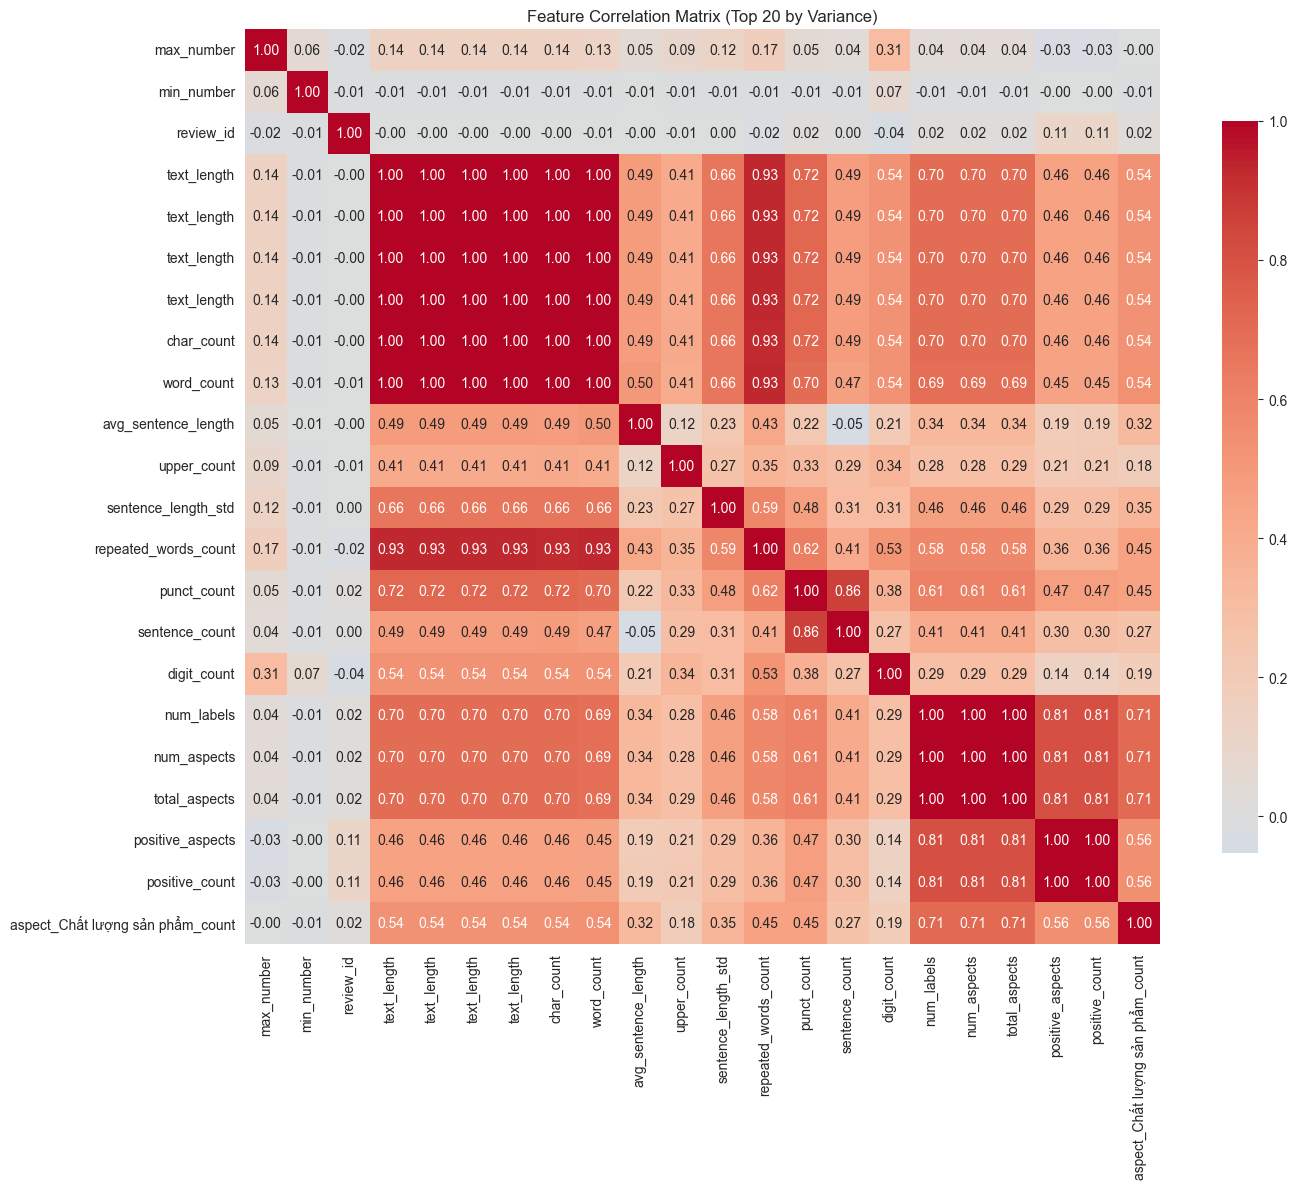

In [55]:
def analyze_feature_importance(features_df, target_col=None):
    """Analyze feature importance and correlations"""
    
    # Remove non-numeric columns
    numeric_features = features_df.select_dtypes(include=[np.number])
    
    # Correlation matrix
    corr_matrix = numeric_features.corr()
    
    # Find highly correlated features
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.8:
                high_corr_pairs.append((
                    corr_matrix.columns[i], 
                    corr_matrix.columns[j], 
                    corr_matrix.iloc[i, j]
                ))
    
    print("=== HIGH CORRELATION PAIRS ===")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} - {feat2}: {corr:.3f}")
    
    # Feature variance
    feature_variance = numeric_features.var().sort_values(ascending=False)
    low_variance_features = feature_variance[feature_variance < 0.01].index.tolist()
    
    print(f"\n=== LOW VARIANCE FEATURES ===")
    print(f"Features with variance < 0.01: {len(low_variance_features)}")
    print(low_variance_features[:10] if len(low_variance_features) > 10 else low_variance_features)
    
    # Feature statistics
    print(f"\n=== FEATURE STATISTICS ===")
    print(f"Total features: {len(numeric_features.columns)}")
    print(f"Features with missing values: {numeric_features.isnull().sum().sum()}")
    print(f"Features with zero variance: {(numeric_features.var() == 0).sum()}")
    
    return corr_matrix, high_corr_pairs, low_variance_features

# Analyze all features
all_features = reviews_extended.select_dtypes(include=[np.number])
corr_matrix, high_corr_pairs, low_variance_features = analyze_feature_importance(all_features)

# Visualization
plt.figure(figsize=(15, 12))
# Select top 20 features by variance for visualization
top_features = all_features.var().nlargest(20).index
sns.heatmap(all_features[top_features].corr(), annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix (Top 20 by Variance)')
plt.tight_layout()
plt.show()

##### Feature Engineering Pipeline

In [56]:
class FeatureEngineeringPipeline:
    def __init__(self):
        self.tfidf_vectorizer = None
        self.feature_columns = None
        self.scaler = None
    
    def fit_transform(self, reviews_df, labels_df):
        """Complete feature engineering pipeline"""
        
        print("Starting Feature Engineering Pipeline...")
        
        # 1. Text features
        print("1. Extracting text features...")
        text_features = extract_text_features(reviews_df)
        
        # 2. Aspect features
        print("2. Extracting aspect features...")
        aspect_features = extract_aspect_features(reviews_df, labels_df)
        
        # 3. Temporal features
        print("3. Extracting temporal features...")
        temporal_features = extract_temporal_features(reviews_df['text'])
        
        # 4. Linguistic features
        print("4. Extracting linguistic features...")
        linguistic_features = extract_linguistic_features(reviews_df['text'])
        
        # 5. TF-IDF features
        print("5. Creating TF-IDF features...")
        tfidf_features, self.tfidf_vectorizer = create_ngram_features(
            reviews_df['text'], max_features=500
        )
        
        # Combine all features
        all_features = pd.concat([
            reviews_df[['review_id']],
            text_features,
            aspect_features,
            temporal_features,
            linguistic_features,
            tfidf_features
        ], axis=1)
        
        # Handle missing values
        all_features = all_features.fillna(0)
        
        # Feature selection
        print("6. Feature selection...")
        numeric_features = all_features.select_dtypes(include=[np.number])
        
        # Remove low variance features
        from sklearn.feature_selection import VarianceThreshold
        variance_selector = VarianceThreshold(threshold=0.01)
        selected_features = variance_selector.fit_transform(numeric_features)
        
        self.feature_columns = numeric_features.columns[variance_selector.get_support()].tolist()
        final_features = pd.DataFrame(selected_features, columns=self.feature_columns)
        final_features['review_id'] = all_features['review_id'].values
        
        print(f"Final feature shape: {final_features.shape}")
        print(f"Features retained: {len(self.feature_columns)}")
        
        return final_features
    
    def transform(self, reviews_df, labels_df):
        """Transform new data using fitted pipeline"""
        # Apply same transformations as in fit_transform
        # (Implementation would follow same steps but use fitted transformers)
        pass

# Apply pipeline
pipeline = FeatureEngineeringPipeline()
final_features = pipeline.fit_transform(reviews_df, labels_df)

print("=== FEATURE ENGINEERING COMPLETE ===")
print(f"Final dataset shape: {final_features.shape}")
print("Sample features:")
print(final_features.head())

Starting Feature Engineering Pipeline...
1. Extracting text features...
2. Extracting aspect features...
3. Extracting temporal features...
4. Extracting linguistic features...
5. Creating TF-IDF features...
6. Feature selection...
Final feature shape: (4039, 46)
Features retained: 46
=== FEATURE ENGINEERING COMPLETE ===
Final dataset shape: (4039, 46)
Sample features:
   review_id  text_length  word_count  sentence_count  char_count  \
0          0        561.0       130.0             9.0       432.0   
1          1        336.0        75.0             6.0       262.0   
2          2        249.0        60.0             0.0       190.0   
3          3        502.0       115.0             2.0       388.0   
4          4        282.0        60.0             3.0       223.0   

   avg_word_length  punct_count  upper_count  digit_count  stopword_ratio  \
0         3.323077         14.0         15.0         37.0        0.284615   
1         3.493333         10.0          8.0          3.0  

##### Feature Validation and Export

In [57]:
def validate_features(features_df):
    """Validate engineered features"""
    
    validation_report = {
        'total_features': len(features_df.columns),
        'total_samples': len(features_df),
        'missing_values': features_df.isnull().sum().sum(),
        'infinite_values': np.isinf(features_df.select_dtypes(include=[np.number])).sum().sum(),
        'constant_features': (features_df.nunique() == 1).sum(),
        'feature_ranges': {}
    }
    
    # Check feature ranges
    numeric_cols = features_df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        validation_report['feature_ranges'][col] = {
            'min': features_df[col].min(),
            'max': features_df[col].max(),
            'mean': features_df[col].mean(),
            'std': features_df[col].std()
        }
    
    print("=== FEATURE VALIDATION REPORT ===")
    print(f"Total features: {validation_report['total_features']}")
    print(f"Total samples: {validation_report['total_samples']}")
    print(f"Missing values: {validation_report['missing_values']}")
    print(f"Infinite values: {validation_report['infinite_values']}")
    print(f"Constant features: {validation_report['constant_features']}")
    
    return validation_report

# Validate features
validation_report = validate_features(final_features)

# Export features for model training
final_features.to_csv('C:/Users/DELL/Tiki_ABSA/notebooks/engineered_features.csv', index=False)
print("\nFeatures exported to 'engineered_features.csv'")

# Export feature metadata
feature_metadata = {
    'feature_columns': pipeline.feature_columns,
    'total_features': len(final_features.columns),
    'feature_types': {
        'text_features': [col for col in final_features.columns if any(x in col for x in ['length', 'count', 'ratio'])],
        'tfidf_features': [col for col in final_features.columns if 'tfidf_' in col],
        'aspect_features': [col for col in final_features.columns if 'aspect_' in col],
        'temporal_features': [col for col in final_features.columns if any(x in col for x in ['date', 'time', 'delivery'])],
        'linguistic_features': [col for col in final_features.columns if any(x in col for x in ['adj_', 'verb_', 'noun_'])]
    },
    'validation_report': validation_report
}

with open('C:/Users/DELL/Tiki_ABSA/notebooks/feature_metadata.json', 'w', encoding='utf-8') as f:
    json.dump(feature_metadata, f, ensure_ascii=False, indent=2, default=str)

print("Feature metadata exported to 'feature_metadata.json'")

=== FEATURE VALIDATION REPORT ===
Total features: 46
Total samples: 4039
Missing values: 0
Infinite values: 0
Constant features: 0

Features exported to 'engineered_features.csv'
Feature metadata exported to 'feature_metadata.json'


### Summary and Insights

In [62]:
print("=== B√ÅO C√ÅO T·ªîNG K·∫æT EDA ===")
print(f"1. T·ªïng quan dataset:")
print(f"   - S·ªë reviews: {len(reviews_df)}")
print(f"   - S·ªë labels: {len(labels_df)}")
print(f"   - S·ªë aspects: {labels_df['aspect'].nunique()}")
print(f"   - ƒê·ªô d√†i trung b√¨nh review: {reviews_df['text_length'].mean():.0f} k√Ω t·ª±")

print(f"\n2. Ph√¢n b·ªë Aspects:")
for aspect, count in asp_counts.head().items():
    print(f"   - {aspect}: {count} ({count/len(labels_df)*100:.1f}%)")

print(f"\n3. Ph√¢n b·ªë Sentiment:")
for sentiment, count in sentiment_counts.items():
    print(f"   - {sentiment}: {count} ({count/len(labels_df)*100:.1f}%)")

print(f"\n4. Insights ch√≠nh:")
print(f"   - Aspect ph·ªï bi·∫øn nh·∫•t: {asp_counts.index[0]}")
print(f"   - T·ª∑ l·ªá sentiment t√≠ch c·ª±c: {sentiment_counts.get('T√≠ch c·ª±c', 0)/len(labels_df)*100:.1f}%")
print(f"   - Review c√≥ sentiment score trung b√¨nh: {reviews_df['sentiment_score'].mean():.2f}")

# Aspect c√≥ sentiment t√≠ch c·ª±c cao nh·∫•t
aspect_positivity = aspect_sentiment_pct['T√≠ch c·ª±c'].sort_values(ascending=False)
print(f"   - Aspect t√≠ch c·ª±c nh·∫•t: {aspect_positivity.index[0]} ({aspect_positivity.iloc[0]:.1f}%)")
print(f"   - Aspect ti√™u c·ª±c nh·∫•t: {aspect_positivity.index[-1]} ({aspect_positivity.iloc[-1]:.1f}%)")

=== B√ÅO C√ÅO T·ªîNG K·∫æT EDA ===
1. T·ªïng quan dataset:
   - S·ªë reviews: 4039
   - S·ªë labels: 12279
   - S·ªë aspects: 4
   - ƒê·ªô d√†i trung b√¨nh review: 119 k√Ω t·ª±

2. Ph√¢n b·ªë Aspects:
   - Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m: 7499 (61.1%)
   - D·ªãch v·ª•: 3159 (25.7%)
   - Gi√° c·∫£: 893 (7.3%)
   - Kh√°c: 728 (5.9%)

3. Ph√¢n b·ªë Sentiment:
   - T√≠ch c·ª±c: 9930 (80.9%)
   - Ti√™u c·ª±c: 1735 (14.1%)
   - B√¨nh th∆∞·ªùng: 614 (5.0%)

4. Insights ch√≠nh:
   - Aspect ph·ªï bi·∫øn nh·∫•t: Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m
   - T·ª∑ l·ªá sentiment t√≠ch c·ª±c: 80.9%
   - Review c√≥ sentiment score trung b√¨nh: 0.65
   - Aspect t√≠ch c·ª±c nh·∫•t: Gi√° c·∫£ (85.0%)
   - Aspect ti√™u c·ª±c nh·∫•t: Kh√°c (79.1%)
